# **Disease Prediction**

### **Import the Datasets and the essential Libraries**

In [1]:
# import libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.inspection import permutation_importance
import seaborn as sns
from collections import Counter
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import plot_importance
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score





In [2]:
# import datasets
d_test = pd.read_csv("/Users/tanujverma/Desktop/NEU/DS/Disease/Testing.csv")
d_train = pd.read_csv("/Users/tanujverma/Desktop/NEU/DS/Disease/Training.csv")

### **Data Preprocessing**

In [3]:
# Print first 5 records of Testing dataset
d_test.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          0                     0                    1          1   
2        0          0                     0                    0          0   
3        1          0                     0                    0          0   
4        1          1                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       1           0             0        0                 0  ...   
2       0           0             1        1                 1  ...   
3       0           0             0        0                 0  ...   
4       0           0             1        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             0                    0   
1           0         0             0                    0   
2           0         0             0                    0   
3           0         0             0                    0   
4           0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   
2                     0                   0        0                     0   
3                     0                   0        0                     0   
4                     0                   0        0                     0   

   yellow_crust_ooze            prognosis  
0                  0     Fungal infection  
1                  0              Allergy  
2                  0                 GERD  
3                  0  Chronic cholestasis  
4                  0        Drug Reaction  

[5 rows x 133 columns]

#Dropping Unamed: 133 as  'Unnamed: 133' has null values. It is dropped as it is a redundant attribute

In [4]:
d_train = d_train.drop("Unnamed: 133", axis=1)


In [5]:
d_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


#Identifying null values in test dataset

In [6]:

d_test.info()
d_test.isnull().sum(axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 43.8+ KB


itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

The TEST dataset contains 42 rows of records and 133 columns of attributes. The data types of the attributes consist of 1 qualitative discrete categorical, and 132 quantitative discrete binary.

In [7]:
# Print first 5 records of training dataset
d_train.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             0                    0   
1           0         0             0                    0   
2           0         0             0                    0   
3           0         0             0                    0   
4           0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   
2                     0                   0        0                     0   
3                     0                   0        0                     0   
4                     0                   0        0                     0   

   yellow_crust_ooze         prognosis  
0                  0  Fungal infection  
1                  0  Fungal infection  
2                  0  Fungal infection  
3                  0  Fungal infection  
4                  0  Fungal infection  

[5 rows x 133 columns]

In [8]:
# display the number of entries, and the data type
d_train.info()
# identify null values
d_train.isnull().sum(axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

#Identifying null values and checking Train dataset

In [9]:
# Checking null values
null_columns = d_train.columns[d_train.isnull().any()]
d_train[null_columns].isnull().sum()
print(type(d_train), type(d_test))


<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


It is found that there are no null values present in the test and train datasets.


### **Univariate Analysis**

The bar graphs are then analyzed to look for flaws in the data, such as incompatible numerical measurement formats and data kinds.

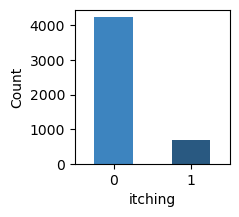

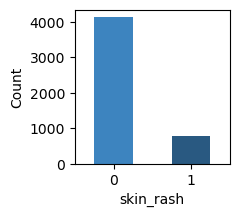

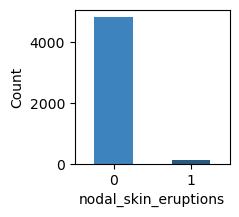

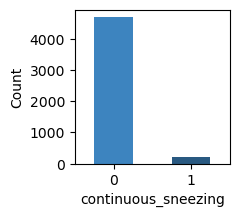

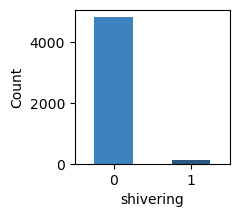

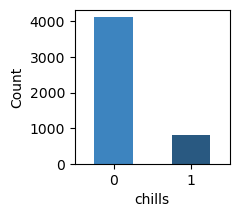

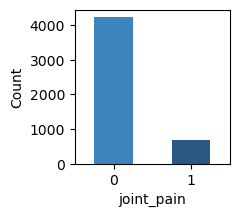

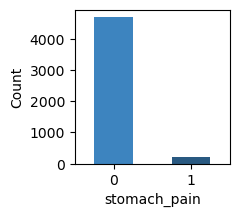

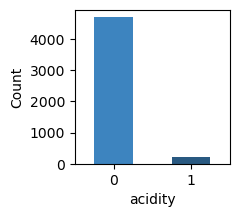

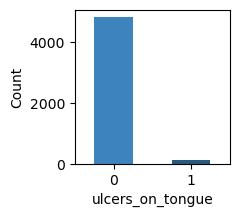

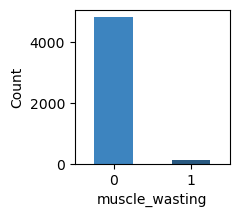

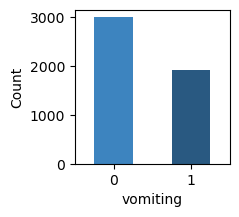

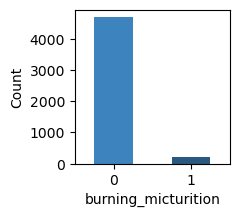

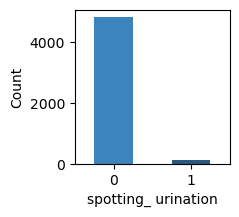

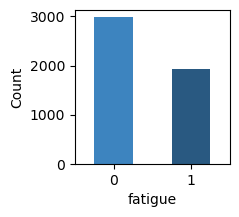

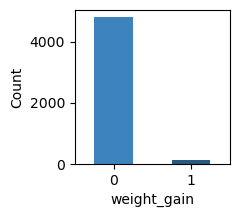

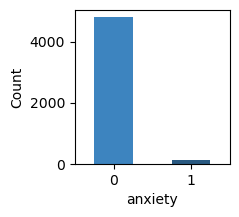

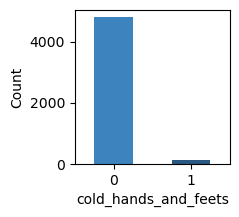

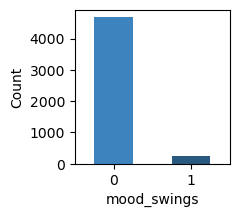

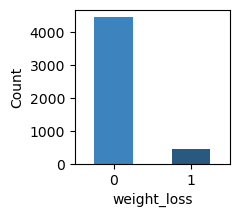

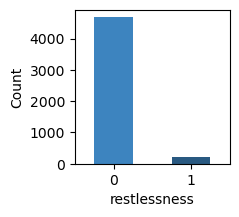

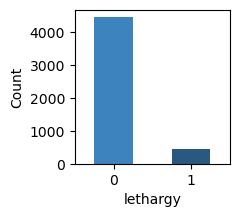

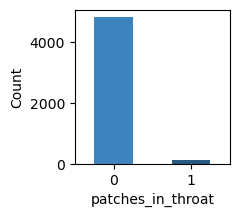

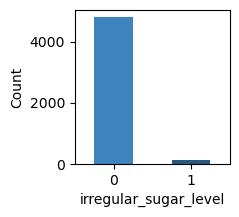

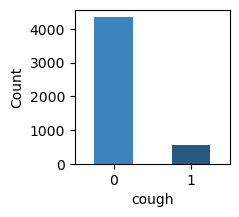

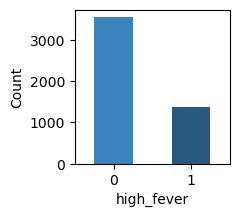

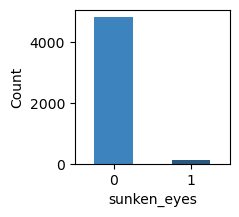

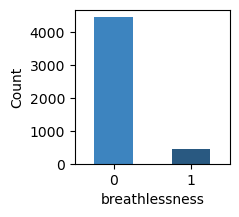

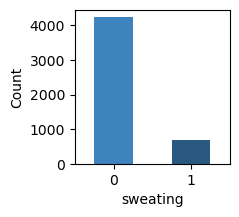

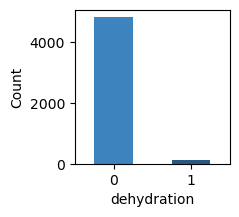

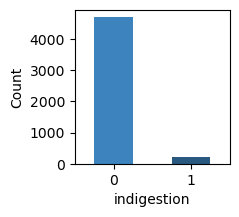

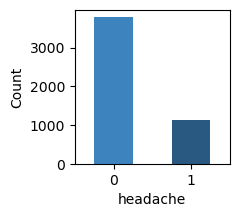

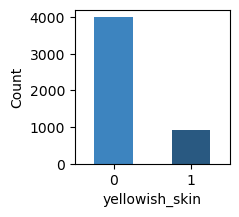

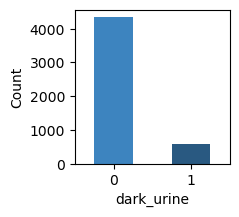

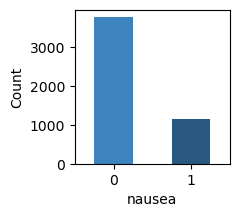

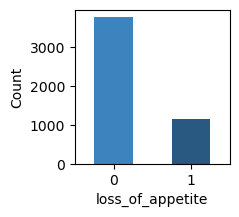

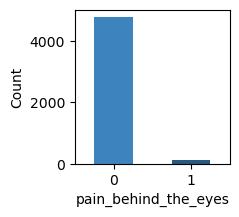

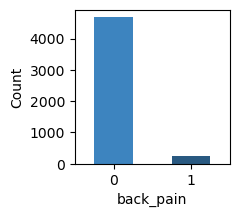

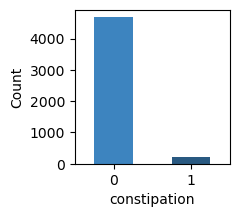

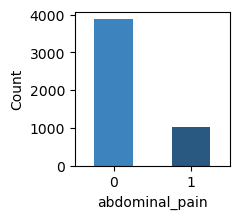

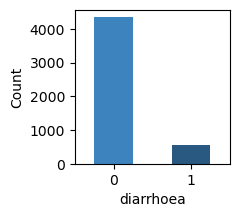

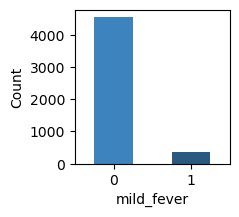

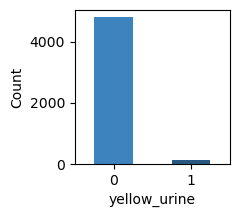

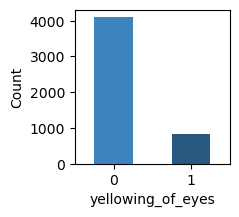

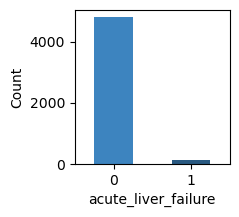

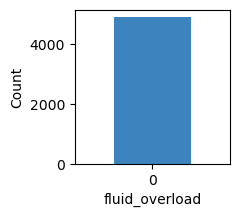

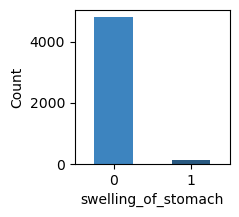

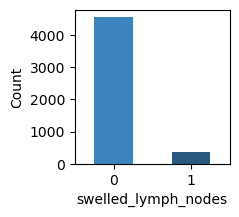

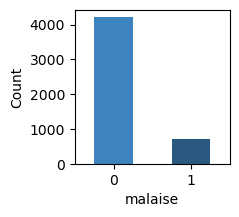

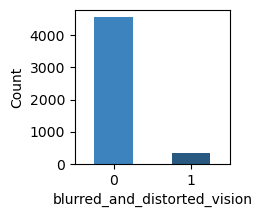

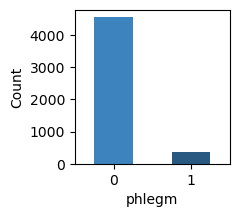

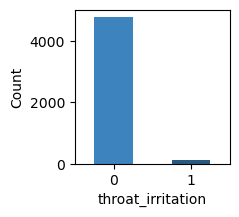

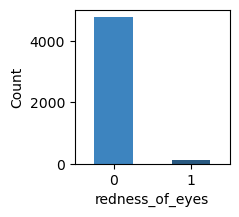

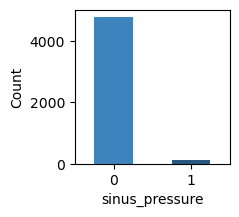

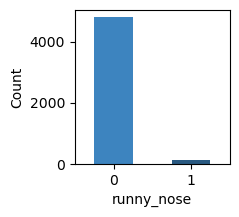

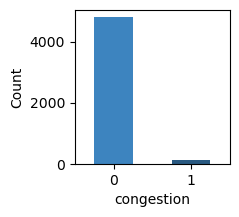

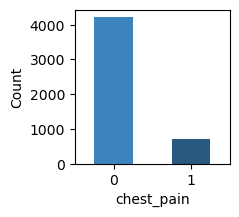

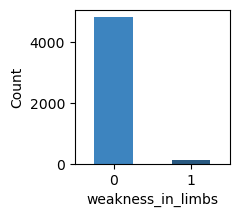

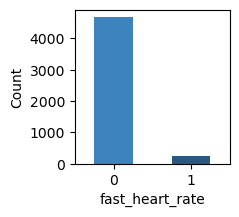

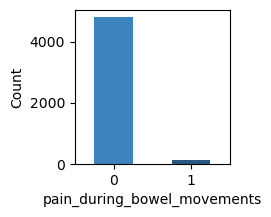

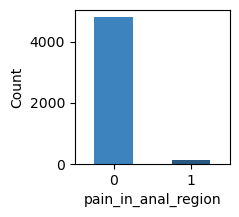

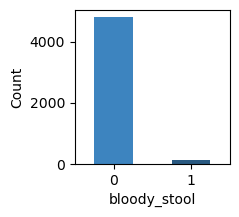

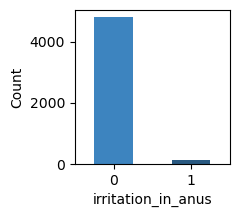

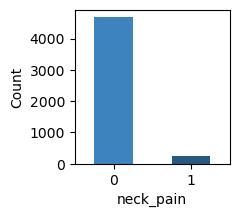

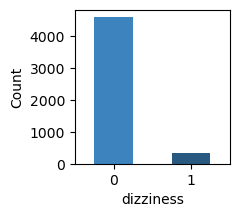

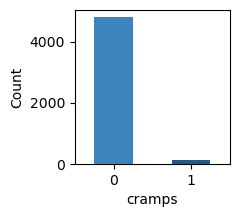

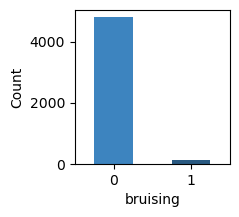

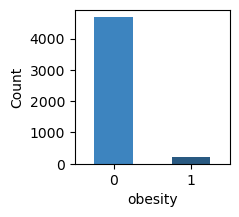

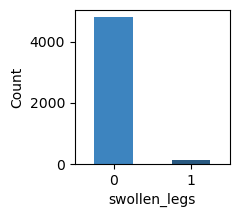

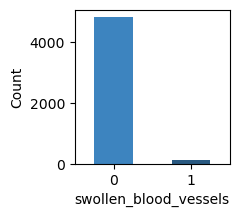

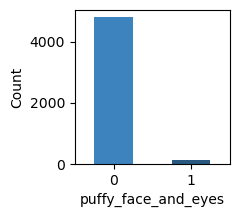

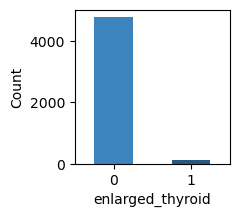

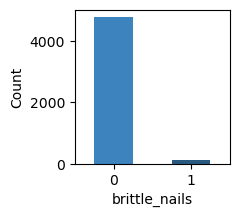

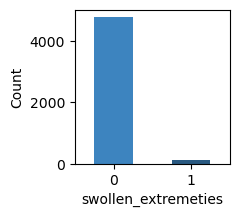

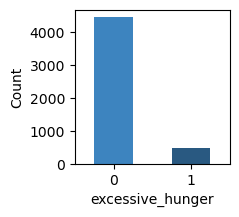

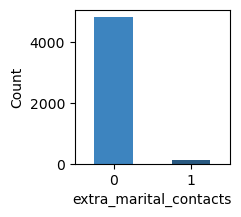

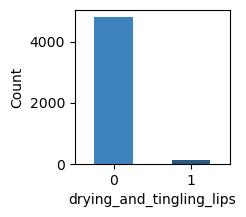

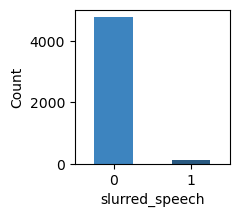

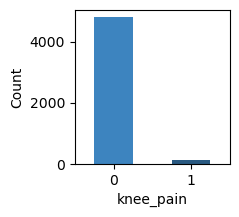

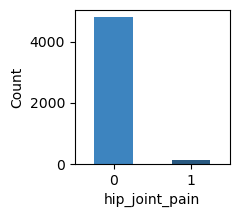

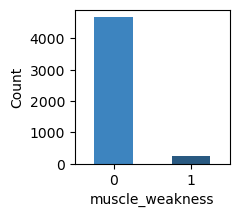

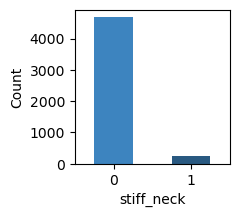

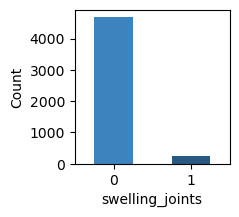

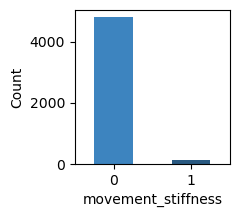

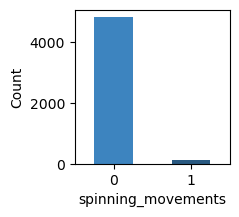

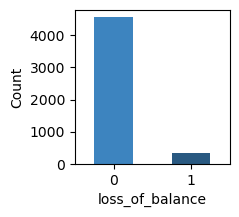

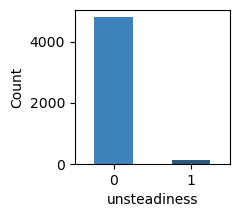

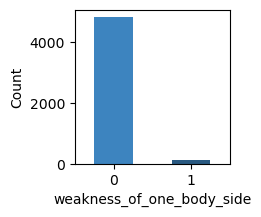

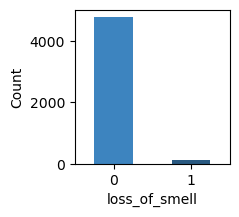

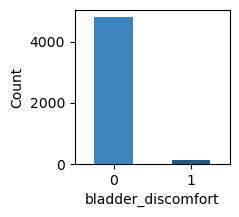

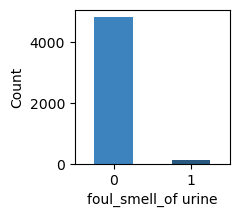

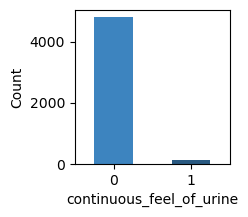

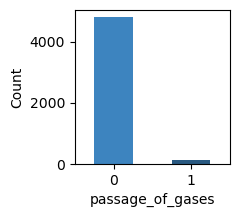

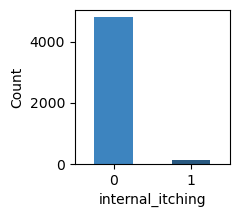

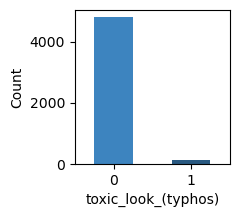

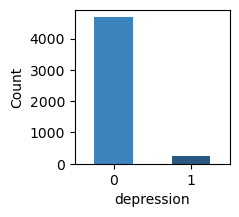

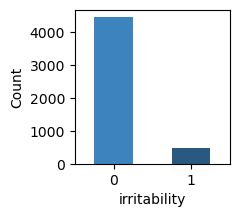

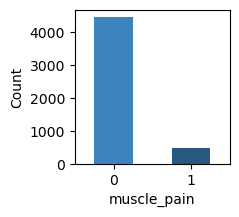

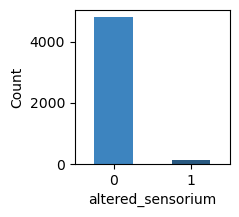

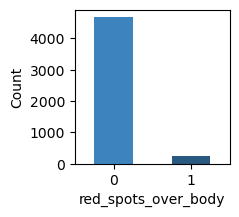

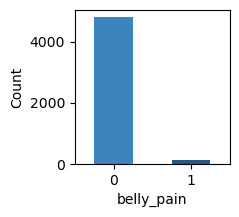

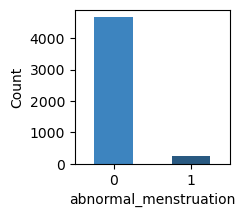

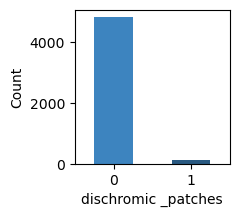

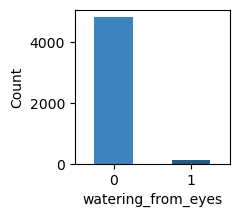

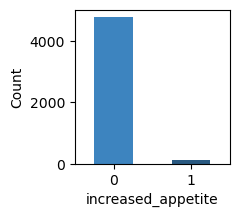

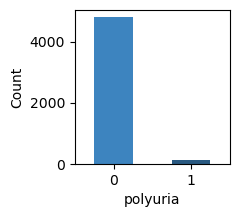

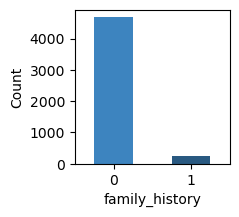

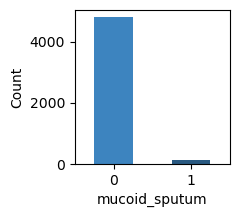

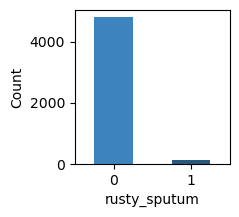

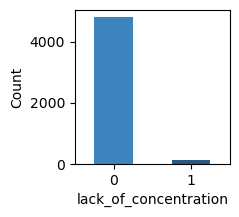

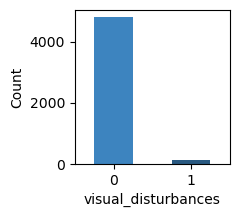

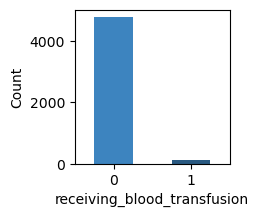

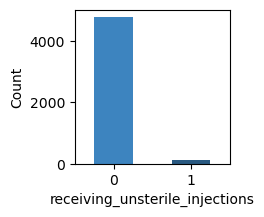

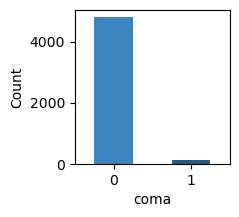

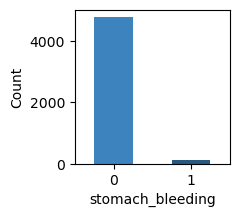

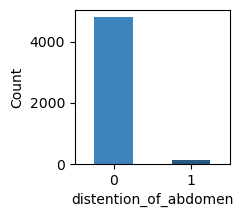

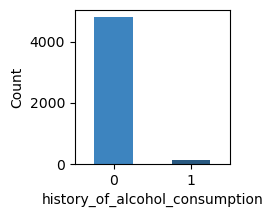

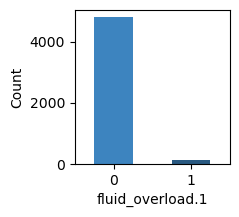

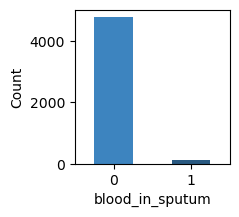

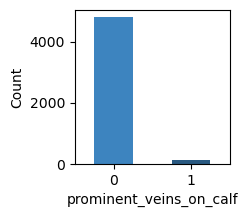

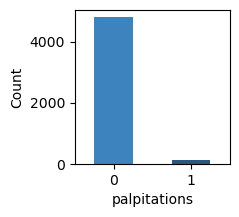

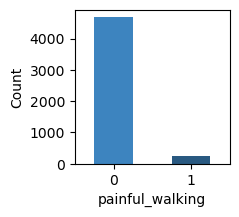

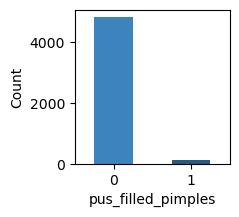

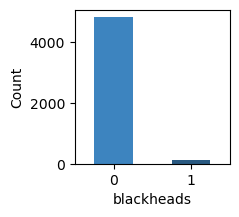

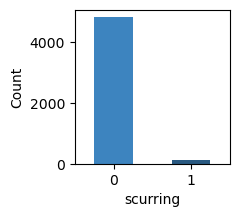

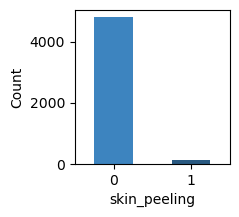

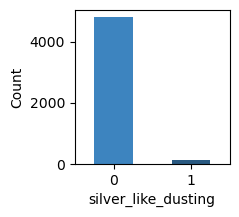

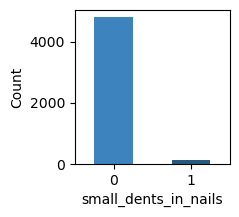

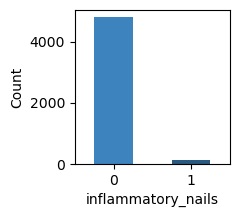

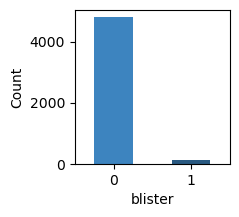

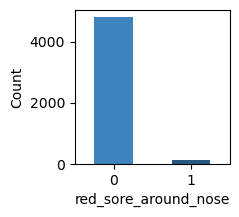

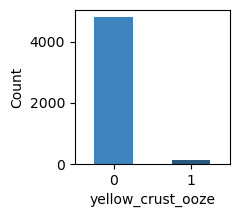

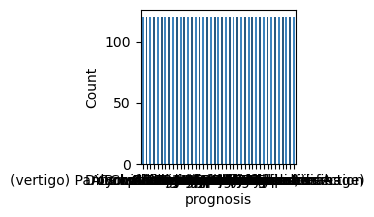

In [10]:


colors = ['#3d84bf', '#295981']
columns = list(d_train.columns)

# Create bar plots for each column
for i in columns:
    fig, ax = plt.subplots(figsize=(2, 2))
    d_train.groupby(i).size().plot(kind='bar', color=colors, ax=ax)
    plt.xticks(rotation=0)
    plt.xlabel(i)
    plt.ylabel('Count')
    #plt.title('Count of "{}"'.format(i))
    plt.show()

There are no improbable value noises or inconsistent value mistakes discovered in this process. The values of each predictor are booleans.
As might be expected in a case study on Disease Prognosis, symptom occurrences are rare to nonexistent.

#By calculating the percentage of 1s and 0s for each feature, we can aggregate the data and visualize the overall distribution of the features.

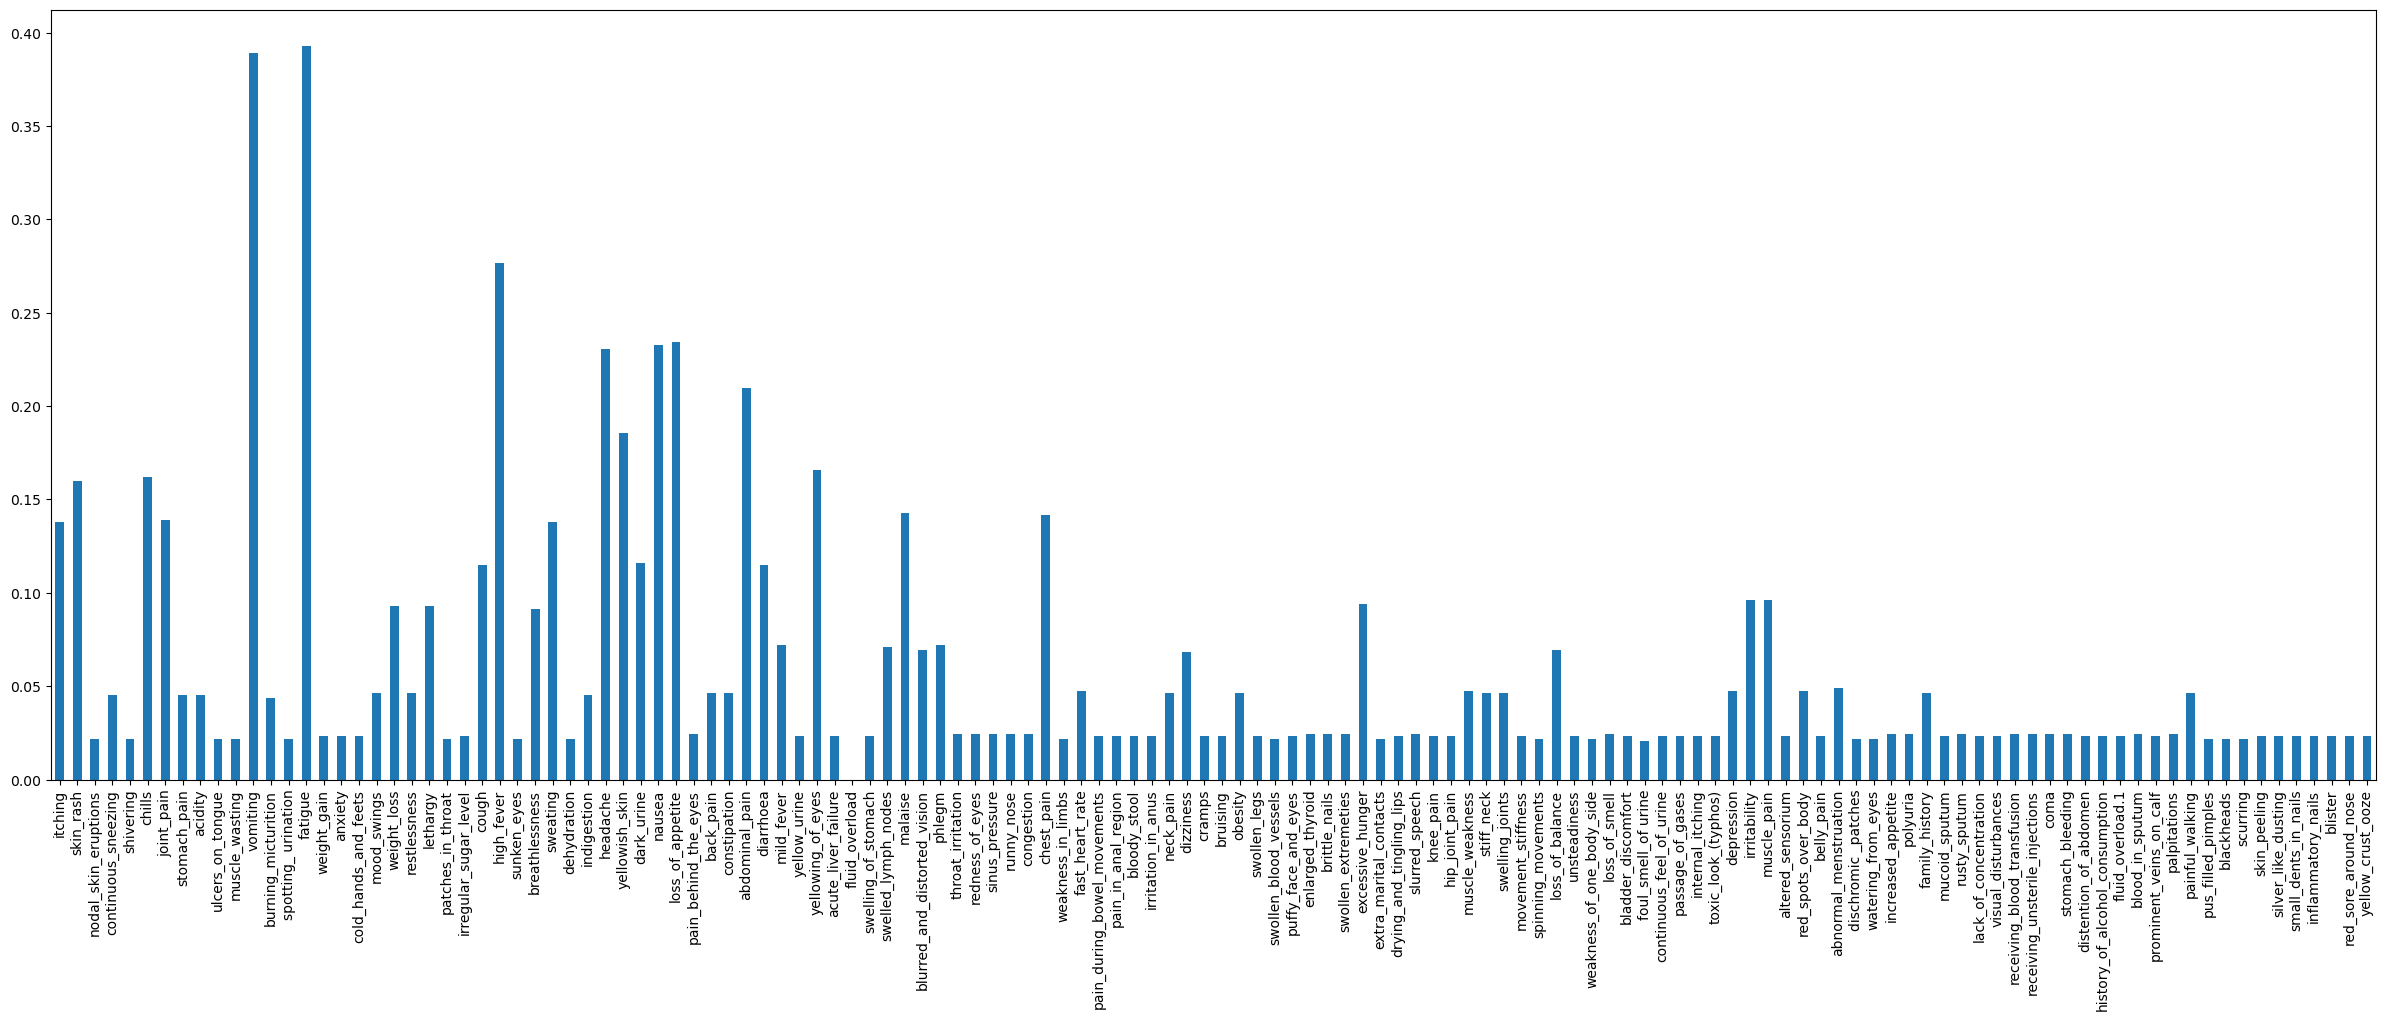

In [11]:
# compute the proportion of 1's and 0's for each feature
prop = d_train.mean()
prop.plot(kind='bar', figsize=(30, 10))
plt.show()

#Bar chart of the distribution of the target variable prognosis in the training data.



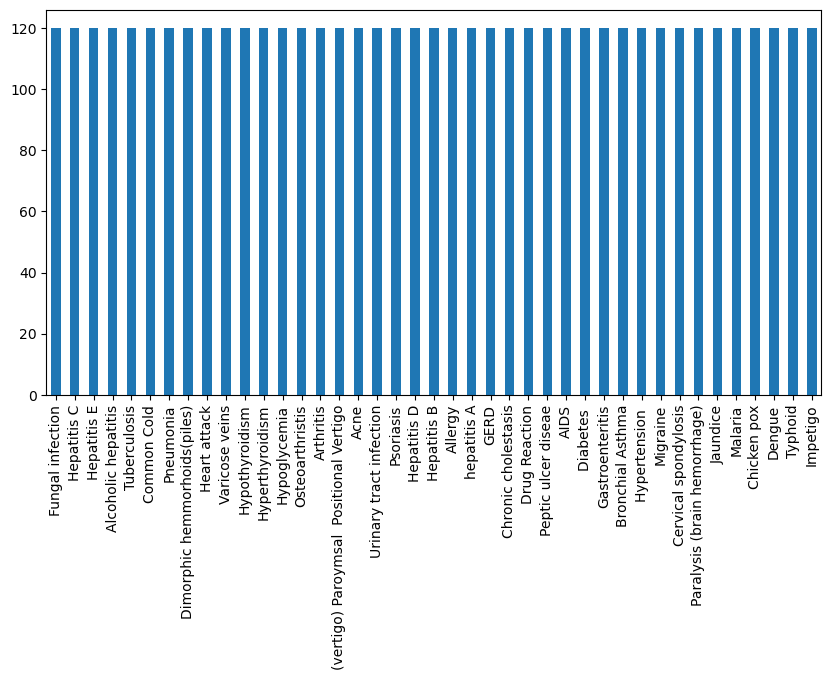

In [12]:
# distribution of the target variable
d_train['prognosis'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.show()

#Histograms for each column in the training dataset d_train

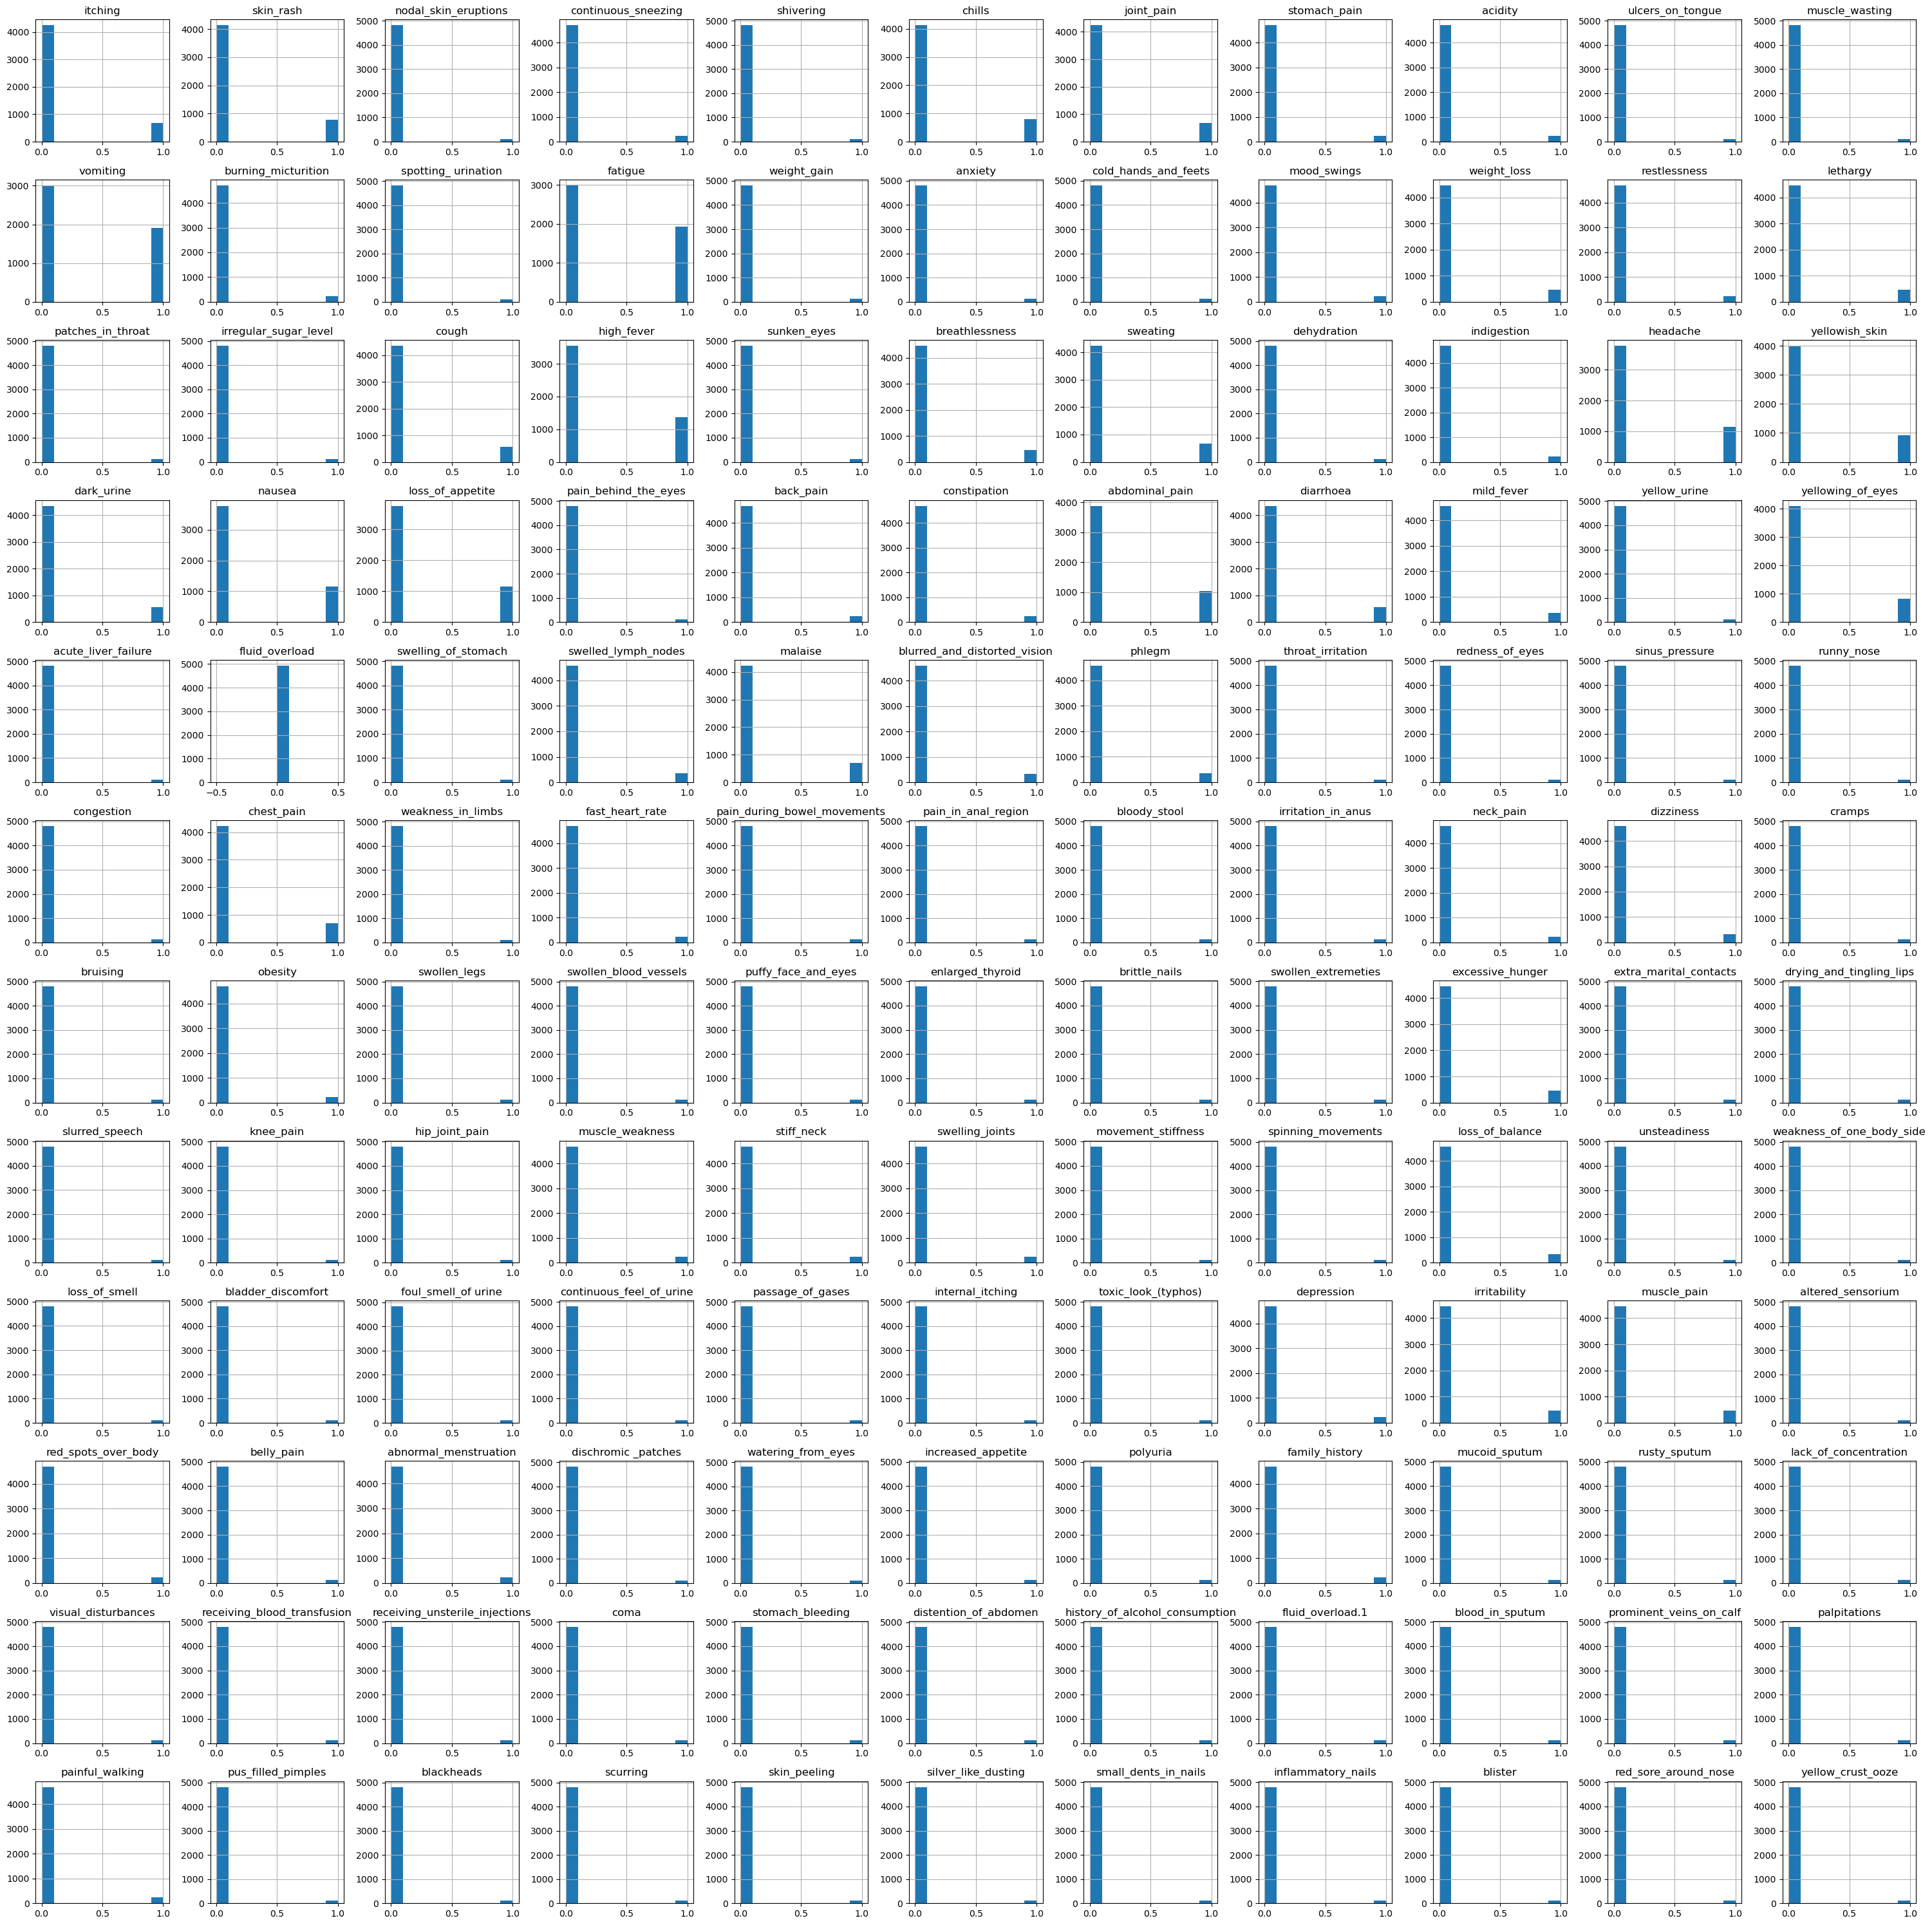

In [13]:
d_train.hist(figsize=(30, 30))
plt.tight_layout()
plt.show()

#Histograms for each column in Test dataset

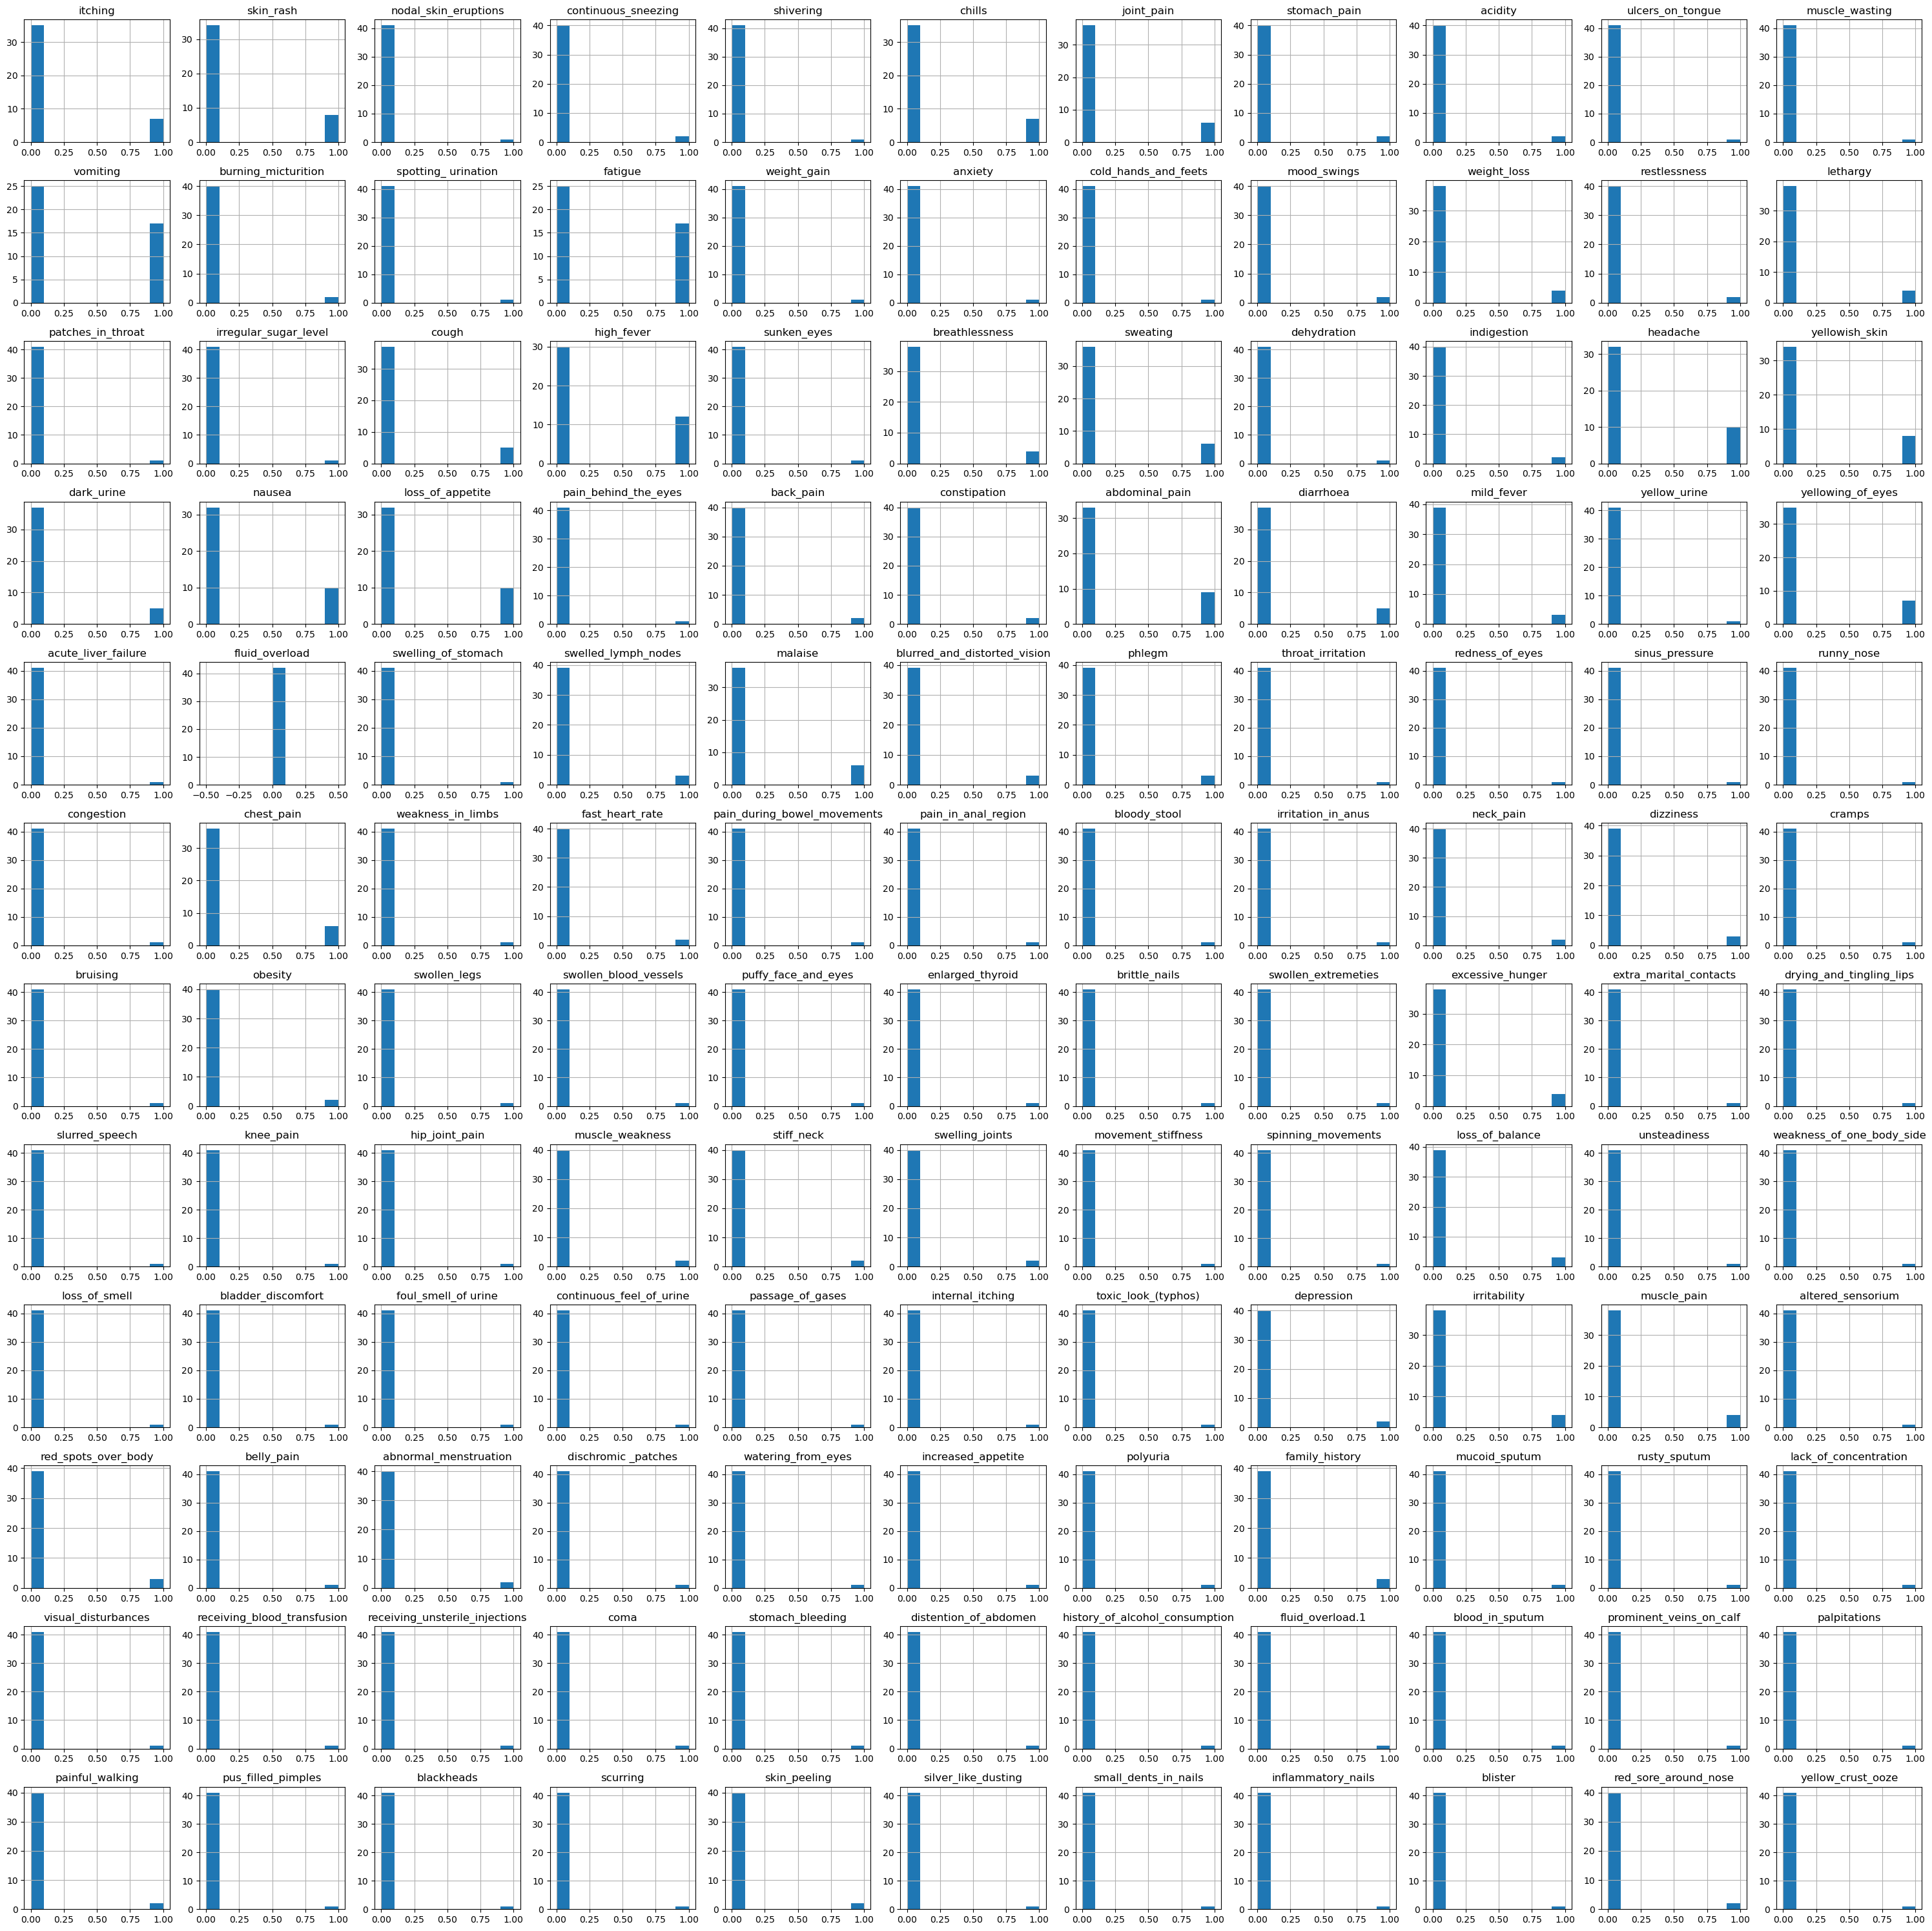

In [14]:
d_test.hist(figsize=(30, 30))
plt.tight_layout()
plt.show()

#Scatter plot matrix for the first 10 columns of the d_train dataframe

<Figure size 1000x1000 with 0 Axes>

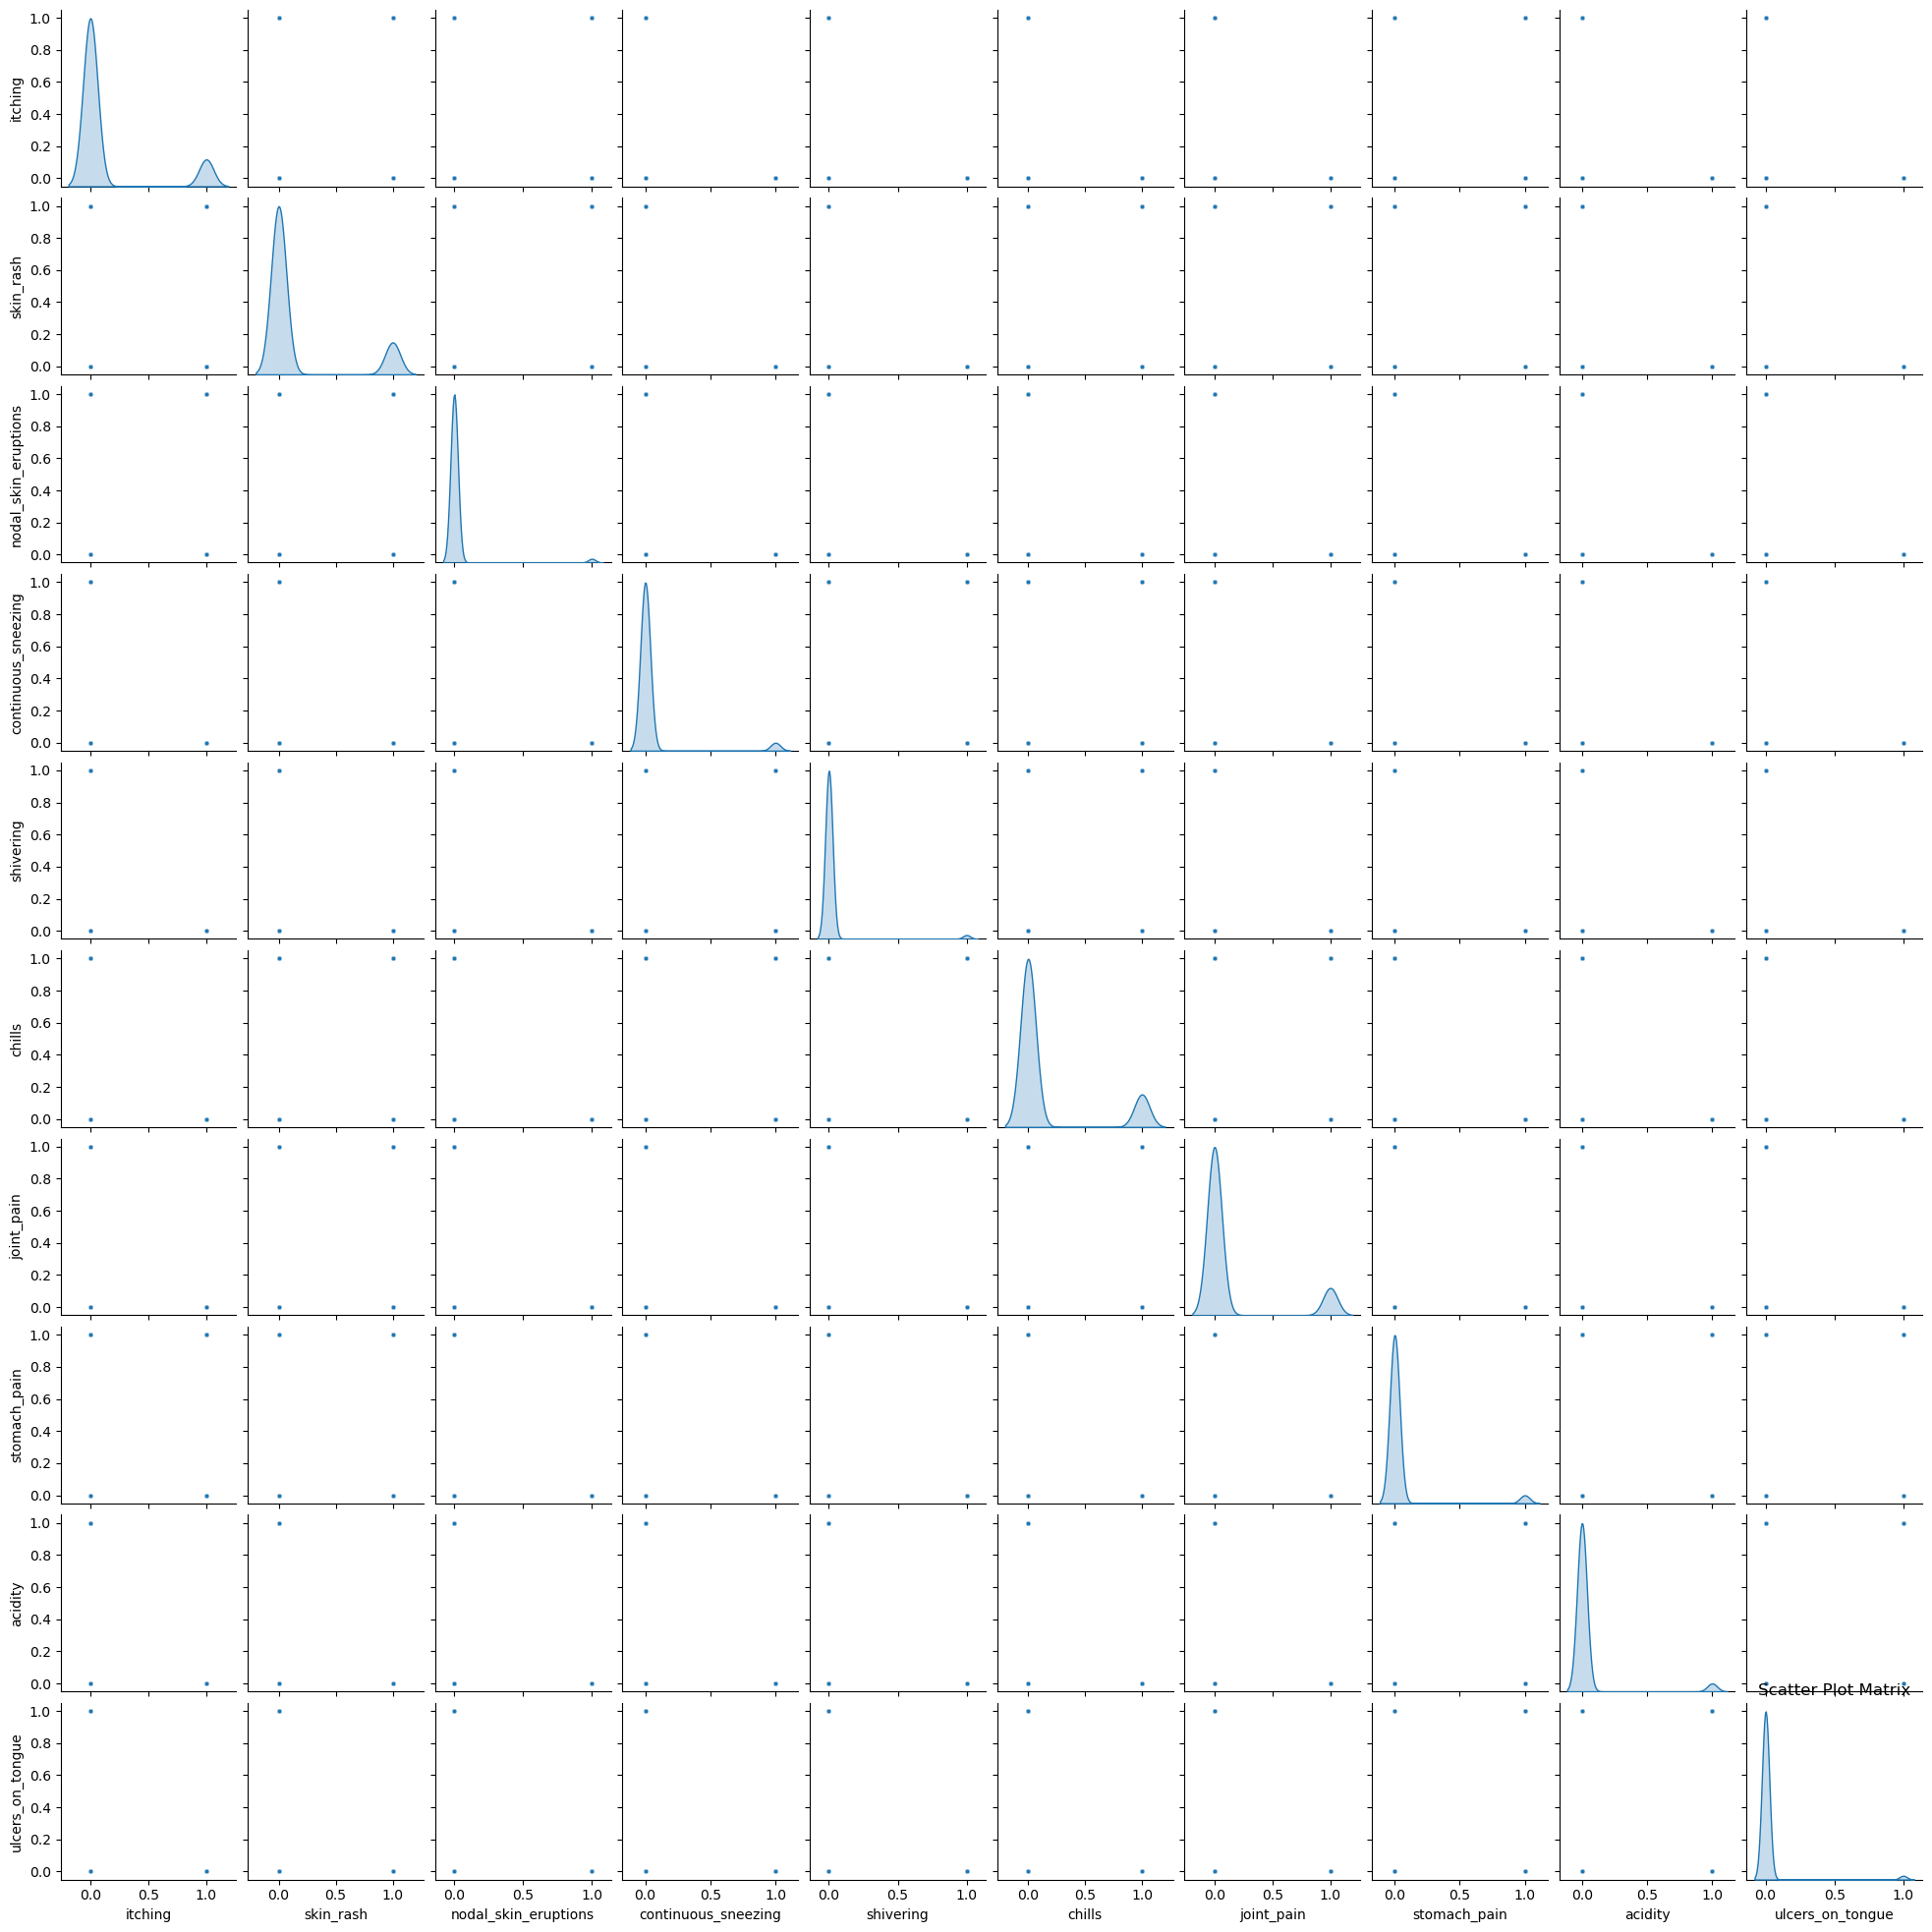

In [15]:
plt.figure(figsize=(10,10))
sns.pairplot(d_train.iloc[:, 0:10], diag_kind='kde', height=2, plot_kws={'s': 10}, palette='husl')
plt.title('Scatter Plot Matrix')
plt.show()

This reveals that neither noises of impossible values nor errors of inconsistent values exist. They all have boolean values.

In the following phase, unique() is used to look for sounds of implausible values, such as incorrectly spelled data entries, in qualitative data.

In [16]:

sorted(d_train.prognosis.unique())

['(vertigo) Paroymsal  Positional Vertigo',
 'AIDS',
 'Acne',
 'Alcoholic hepatitis',
 'Allergy',
 'Arthritis',
 'Bronchial Asthma',
 'Cervical spondylosis',
 'Chicken pox',
 'Chronic cholestasis',
 'Common Cold',
 'Dengue',
 'Diabetes ',
 'Dimorphic hemmorhoids(piles)',
 'Drug Reaction',
 'Fungal infection',
 'GERD',
 'Gastroenteritis',
 'Heart attack',
 'Hepatitis B',
 'Hepatitis C',
 'Hepatitis D',
 'Hepatitis E',
 'Hypertension ',
 'Hyperthyroidism',
 'Hypoglycemia',
 'Hypothyroidism',
 'Impetigo',
 'Jaundice',
 'Malaria',
 'Migraine',
 'Osteoarthristis',
 'Paralysis (brain hemorrhage)',
 'Peptic ulcer diseae',
 'Pneumonia',
 'Psoriasis',
 'Tuberculosis',
 'Typhoid',
 'Urinary tract infection',
 'Varicose veins',
 'hepatitis A']

It is discovered that there are no noises of impossible values or errors of inconsistent values as a result of this.


Impossible and extreme numerical values can be judged to be inaccurate data entries when they differ from the mean attribute value by a significant margin.

No numbers were considered outliers or unrealistic and extreme values in this case, because all numerical values are reasonable and within an expected range in connection to the Disease Prediction's absence or present case study.

In this instance, duplicate rows or records will not be removed from the training dataset. Because the training dataset lacks a unique identifier that distinguishes independent things, there is no duplication that leads to erroneous results and consequences.
Nonetheless, the test dataset will be reviewed for duplicated rows.

In [17]:

d_test[d_test.duplicated(subset = None, keep = False)]

Empty DataFrame
Columns: [itching, skin_rash, nodal_skin_eruptions, continuous_sneezing, shivering, chills, joint_pain, stomach_pain, acidity, ulcers_on_tongue, muscle_wasting, vomiting, burning_micturition, spotting_ urination, fatigue, weight_gain, anxiety, cold_hands_and_feets, mood_swings, weight_loss, restlessness, lethargy, patches_in_throat, irregular_sugar_level, cough, high_fever, sunken_eyes, breathlessness, sweating, dehydration, indigestion, headache, yellowish_skin, dark_urine, nausea, loss_of_appetite, pain_behind_the_eyes, back_pain, constipation, abdominal_pain, diarrhoea, mild_fever, yellow_urine, yellowing_of_eyes, acute_liver_failure, fluid_overload, swelling_of_stomach, swelled_lymph_nodes, malaise, blurred_and_distorted_vision, phlegm, throat_irritation, redness_of_eyes, sinus_pressure, runny_nose, congestion, chest_pain, weakness_in_limbs, fast_heart_rate, pain_during_bowel_movements, pain_in_anal_region, bloody_stool, irritation_in_anus, neck_pain, dizziness, cramps, bruising, obesity, swollen_legs, swollen_blood_vessels, puffy_face_and_eyes, enlarged_thyroid, brittle_nails, swollen_extremeties, excessive_hunger, extra_marital_contacts, drying_and_tingling_lips, slurred_speech, knee_pain, hip_joint_pain, muscle_weakness, stiff_neck, swelling_joints, movement_stiffness, spinning_movements, loss_of_balance, unsteadiness, weakness_of_one_body_side, loss_of_smell, bladder_discomfort, foul_smell_of urine, continuous_feel_of_urine, passage_of_gases, internal_itching, toxic_look_(typhos), depression, irritability, muscle_pain, altered_sensorium, red_spots_over_body, ...]
Index: []

[0 rows x 133 columns]

The test dataset is duplicate-free.

As only one dataset is used for training and testing without schema integrations, there are no entity identification concerns or data value conflicts.

Data transformation checks the dataset's total range. To simplify visualization and modeling, all values should be modest. All values are either 0 or 1 (boolean), hence data processing is not needed to scale values into a comparable range for visualization and modeling.

Attribute dimensionality reduction may remove redundant attributes. No related cases have been found.

To find multicollinearity—high intercorrelation above 0.5 between two attributes—a correlation heatmap lists all correlation coefficients. One characteristic with multicollinearity will be eliminated because it would be redundant to have both with practically mirrored values and hence almost perfect descriptions of each other. avoid overfitting.

The correlation type and strength compare and define the linear relationship between pairs of features. Positive correlations mean both qualities will change in the same direction, whereas negative correlations mean opposing changes. Correlation strength increases relationship strength.

#Cheking test and train data

In [18]:
d_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 43.8+ KB


In [19]:
d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


The training dataset has 4920 rows of records and 133 columns of characteristics. The attributes' data types are 1 qualitative discrete categorical and 132 quantitative discrete binary. Memory consumption is at least 5 MB.

The test dataset has 42 rows of entries and 133 columns of attributes. The attributes' data types are 1 qualitative discrete categorical and 132 quantitative discrete binary. The amount of RAM used is at least 43.8 KBs.

Data pre-processing is now complete.

### **Exploratory Data Analysis (EDA)**

Prior to formal modeling and graphical representations and visualisations, EDA seeks to conduct preliminary studies on data in order to uncover patterns, check assumptions, and test hypotheses. The summarized information on primary characteristics and hidden trends in data can assist doctors in identifying worry areas and difficulties, and resolving these can improve their accuracy in diagnosing diseases.

**Target Variable Distribution**

# list and count the target class label names and frequency of occurrence

In [20]:

count = Counter(d_train['prognosis'])
count.items()

dict_items([('Fungal infection', 120), ('Allergy', 120), ('GERD', 120), ('Chronic cholestasis', 120), ('Drug Reaction', 120), ('Peptic ulcer diseae', 120), ('AIDS', 120), ('Diabetes ', 120), ('Gastroenteritis', 120), ('Bronchial Asthma', 120), ('Hypertension ', 120), ('Migraine', 120), ('Cervical spondylosis', 120), ('Paralysis (brain hemorrhage)', 120), ('Jaundice', 120), ('Malaria', 120), ('Chicken pox', 120), ('Dengue', 120), ('Typhoid', 120), ('hepatitis A', 120), ('Hepatitis B', 120), ('Hepatitis C', 120), ('Hepatitis D', 120), ('Hepatitis E', 120), ('Alcoholic hepatitis', 120), ('Tuberculosis', 120), ('Common Cold', 120), ('Pneumonia', 120), ('Dimorphic hemmorhoids(piles)', 120), ('Heart attack', 120), ('Varicose veins', 120), ('Hypothyroidism', 120), ('Hyperthyroidism', 120), ('Hypoglycemia', 120), ('Osteoarthristis', 120), ('Arthritis', 120), ('(vertigo) Paroymsal  Positional Vertigo', 120), ('Acne', 120), ('Urinary tract infection', 120), ('Psoriasis', 120), ('Impetigo', 120)]

#Count plot using Seaborn library to show the number of occurrences of each target class label

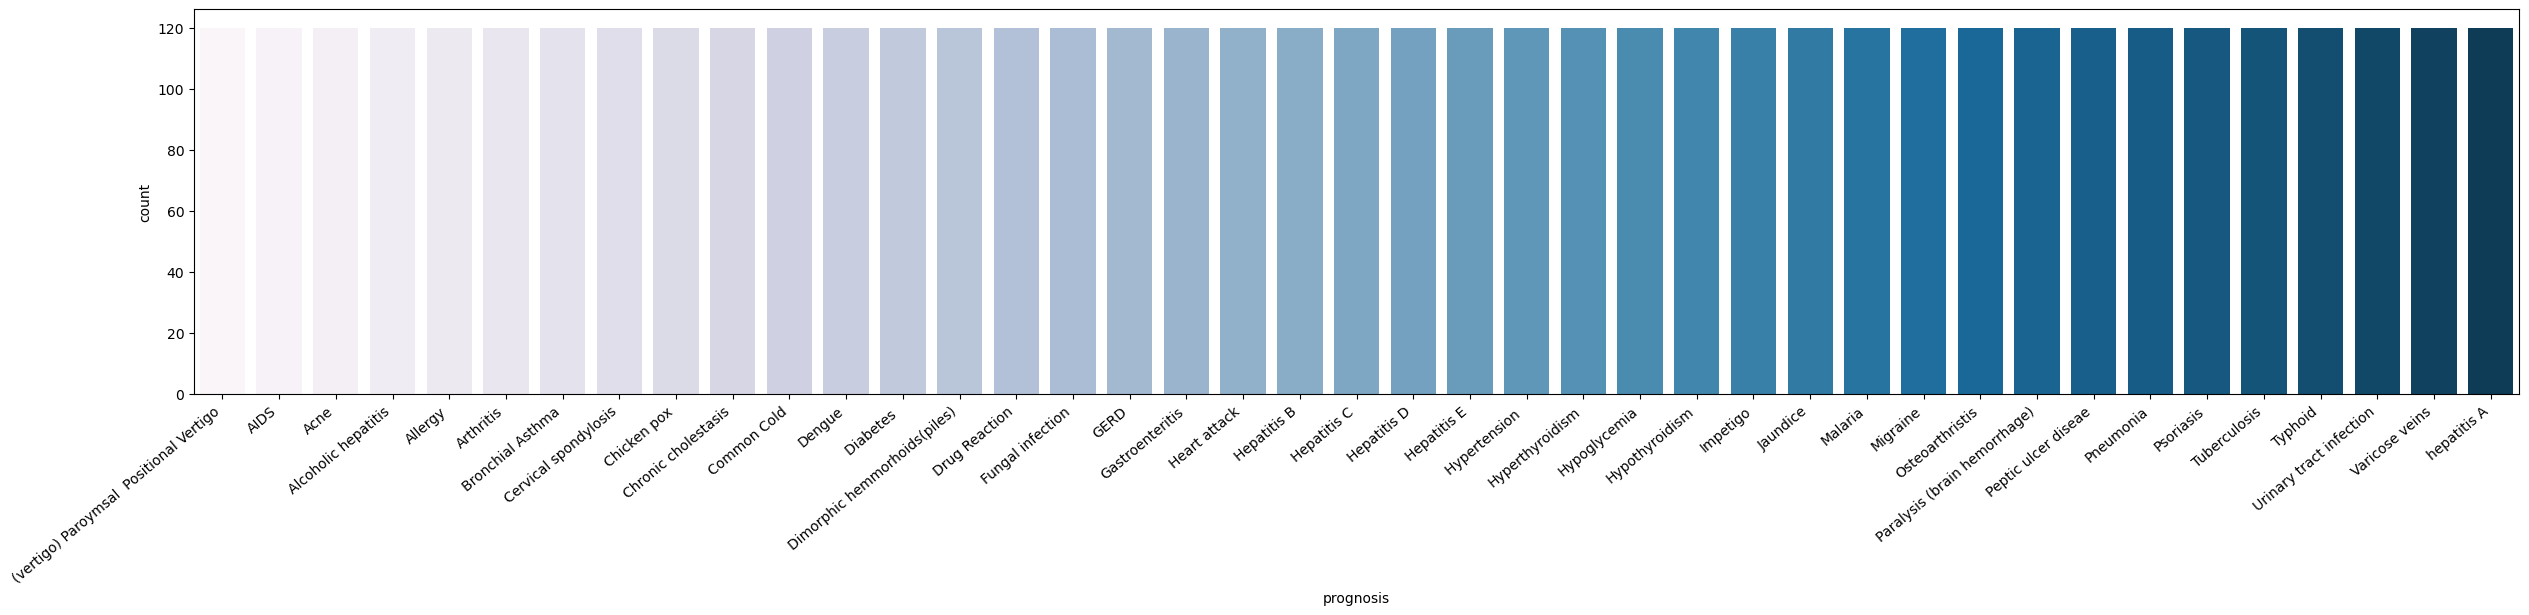

In [21]:

if d_train['prognosis'].dtype != 'category':
    d_train['prognosis'] = d_train['prognosis'].astype('category')


plt.figure(figsize=(30, 5))
ax = sns.countplot(x='prognosis', data=d_train, palette='PuBu')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

#List and count the target class label names, as well as the frequency with which they appear

In [22]:
count = Counter(d_test['prognosis'])
count.items()

dict_items([('Fungal infection', 2), ('Allergy', 1), ('GERD', 1), ('Chronic cholestasis', 1), ('Drug Reaction', 1), ('Peptic ulcer diseae', 1), ('AIDS', 1), ('Diabetes ', 1), ('Gastroenteritis', 1), ('Bronchial Asthma', 1), ('Hypertension ', 1), ('Migraine', 1), ('Cervical spondylosis', 1), ('Paralysis (brain hemorrhage)', 1), ('Jaundice', 1), ('Malaria', 1), ('Chicken pox', 1), ('Dengue', 1), ('Typhoid', 1), ('hepatitis A', 1), ('Hepatitis B', 1), ('Hepatitis C', 1), ('Hepatitis D', 1), ('Hepatitis E', 1), ('Alcoholic hepatitis', 1), ('Tuberculosis', 1), ('Common Cold', 1), ('Pneumonia', 1), ('Dimorphic hemmorhoids(piles)', 1), ('Heart attack', 1), ('Varicose veins', 1), ('Hypothyroidism', 1), ('Hyperthyroidism', 1), ('Hypoglycemia', 1), ('Osteoarthristis', 1), ('Arthritis', 1), ('(vertigo) Paroymsal  Positional Vertigo', 1), ('Acne', 1), ('Urinary tract infection', 1), ('Psoriasis', 1), ('Impetigo', 1)])

#List and display the number of  target class variables

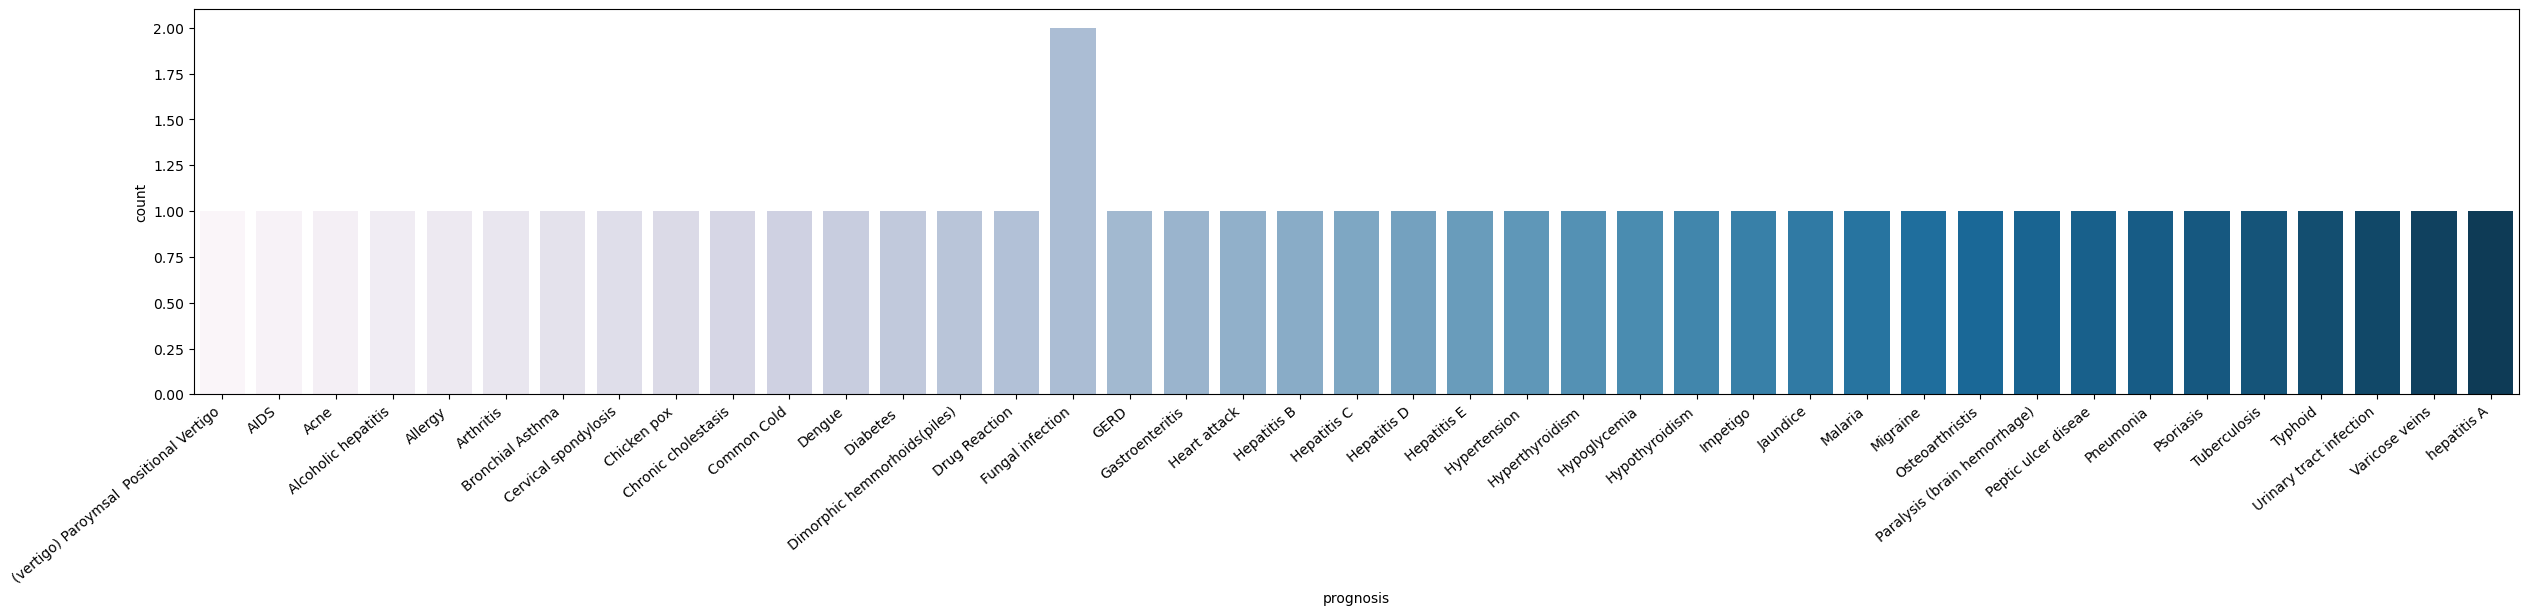

In [23]:

if d_test['prognosis'].dtype != 'category':
    d_test['prognosis'] = d_test['prognosis'].astype('category')


plt.figure(figsize=(30, 5))
ax = sns.countplot(x='prognosis', data=d_test, palette='PuBu')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

This clearly illustrates that data available for most target labels are proportionate, which will be taken note of for further data visualisations and analysis later on.

Next, analyse the individual qualitative attributes of the 132 symptoms:

**Feature Importance**

For these quantitative binary attributes of symptoms, their linear relationships and their strengths can be compared using a correlation heatmap.

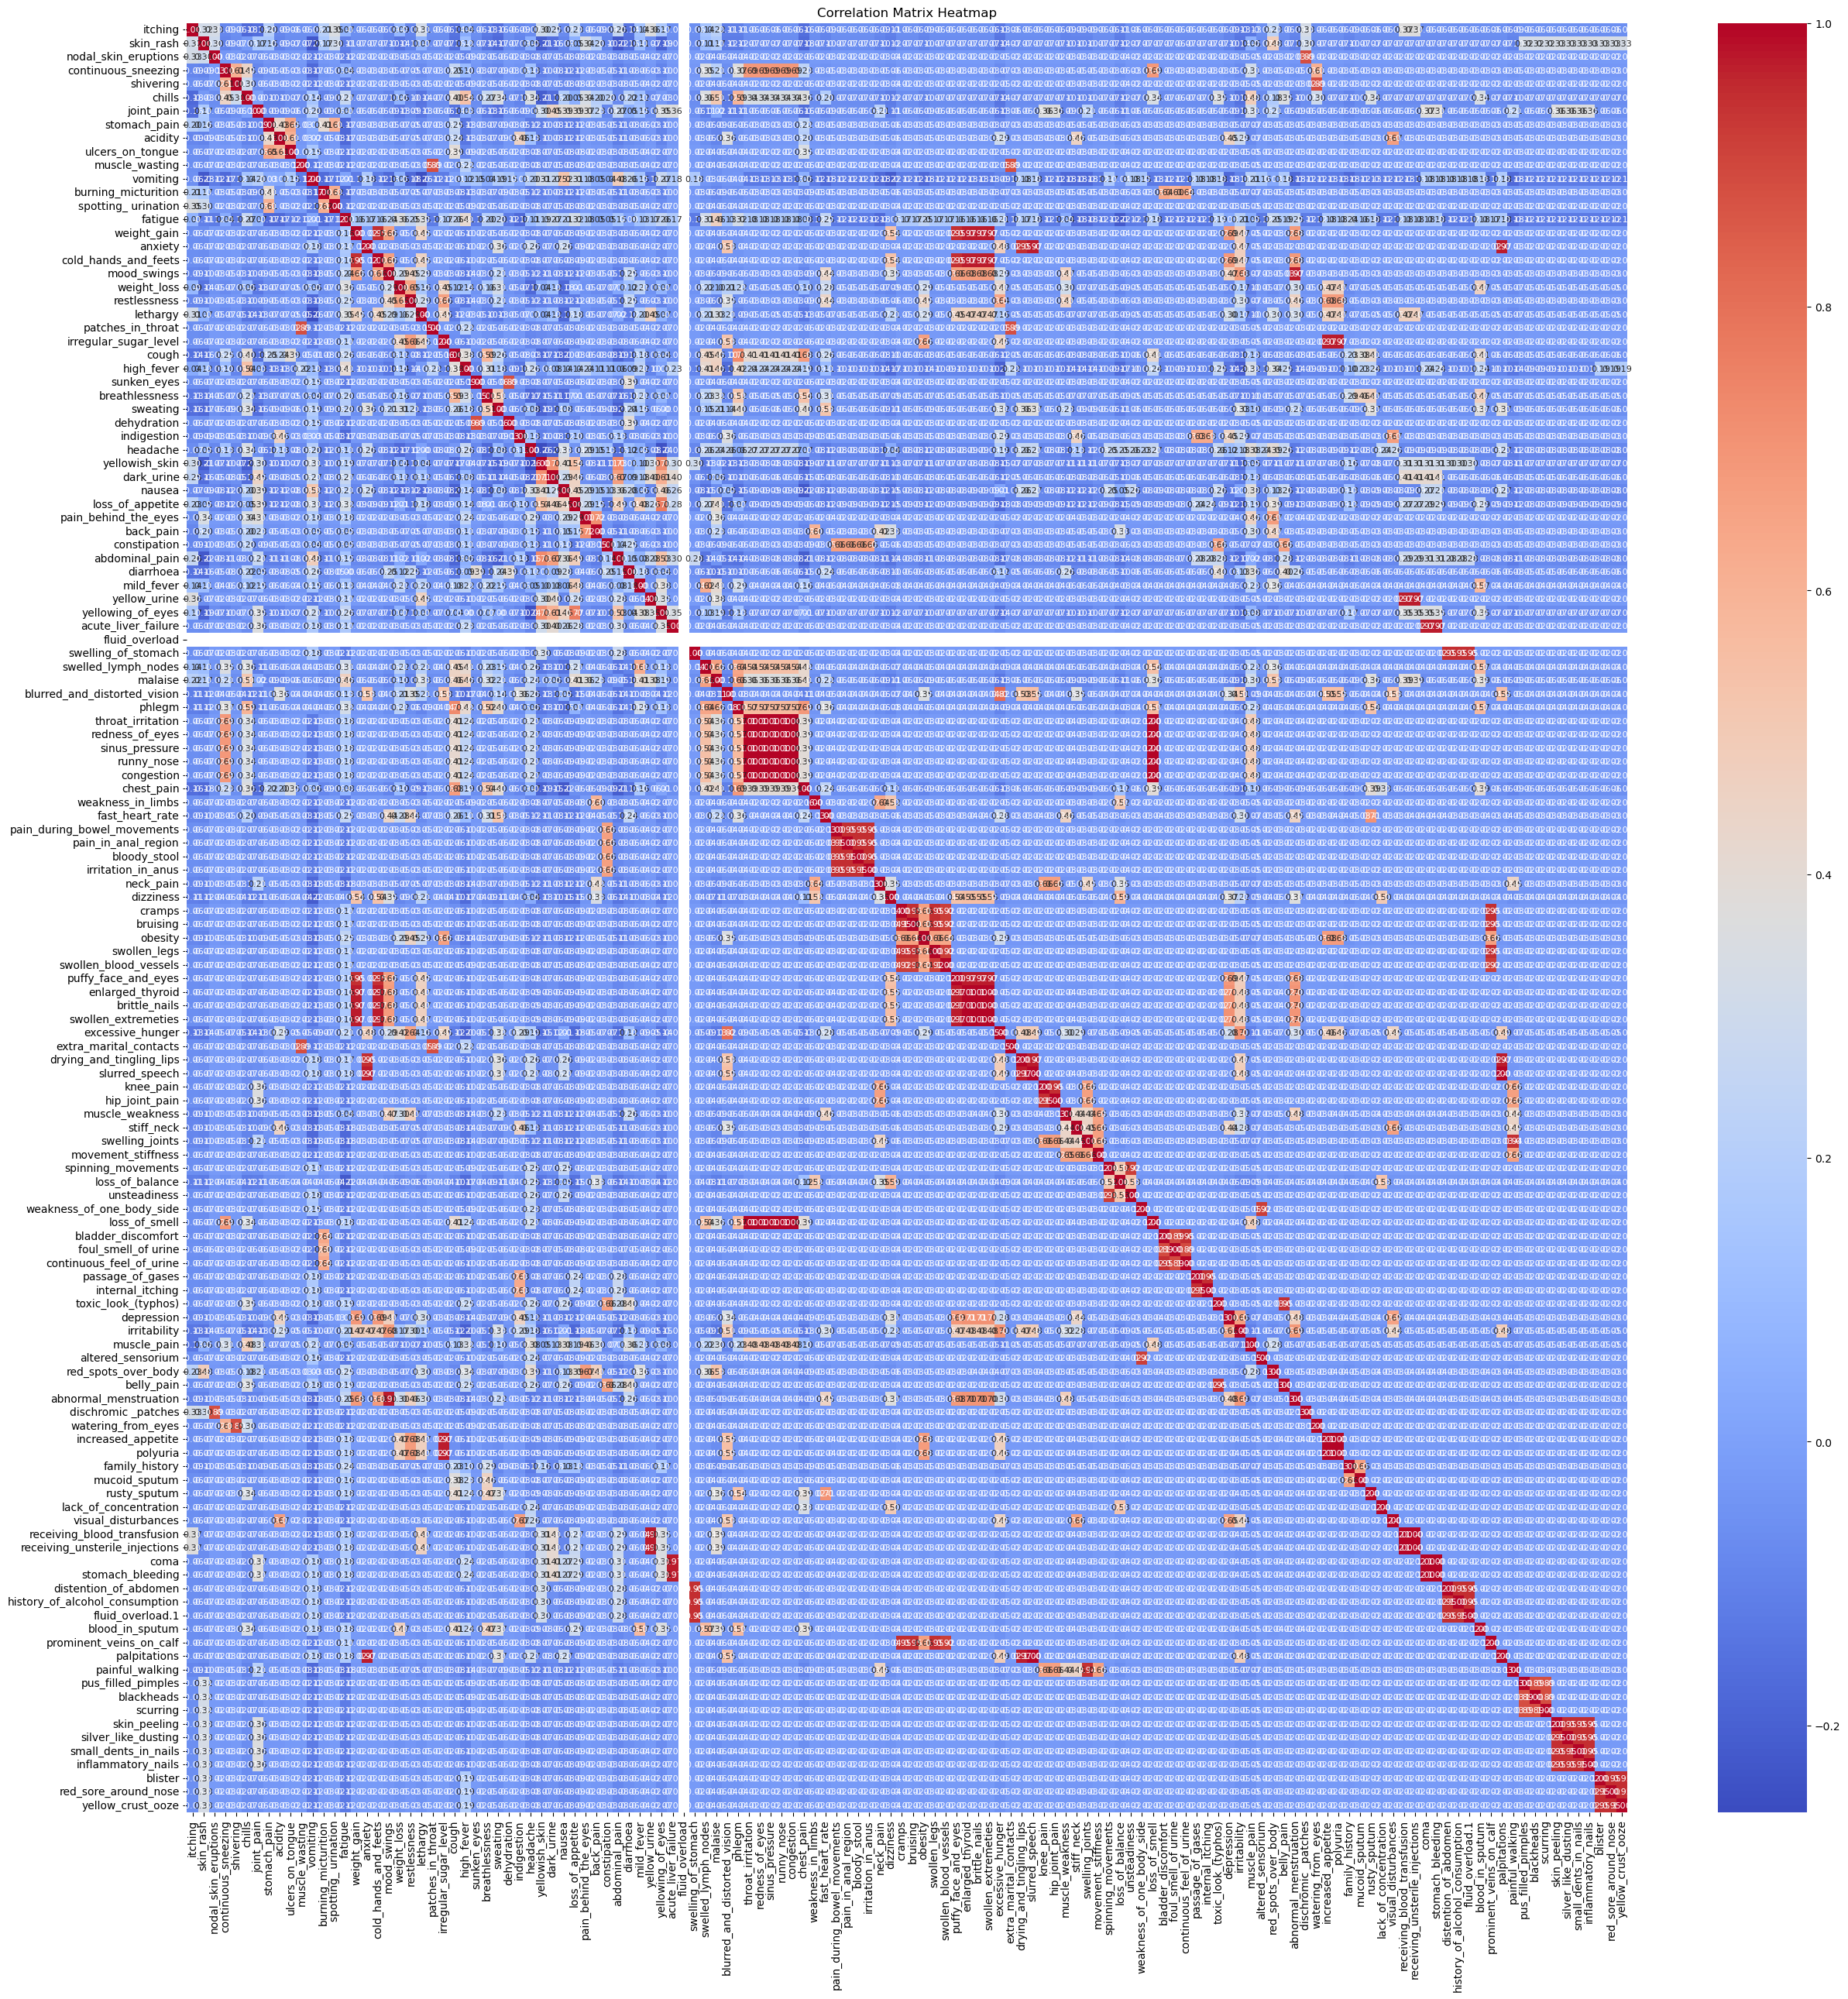

In [24]:

plt.figure(figsize=(30,30))
corr_matrix = d_train.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"fontsize":8})
plt.title('Correlation Matrix Heatmap')
plt.show()

Almost all symptoms have weak linear correlations, which is indicative that these symptoms do not come hand-in-hand.

Lastly, the summary statistics will be considered.

In [25]:
d_train.describe() 

itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  4920.000000  4920.000000           4920.000000          4920.000000   
mean      0.137805     0.159756              0.021951             0.045122   
std       0.344730     0.366417              0.146539             0.207593   
min       0.000000     0.000000              0.000000             0.000000   
25%       0.000000     0.000000              0.000000             0.000000   
50%       0.000000     0.000000              0.000000             0.000000   
75%       0.000000     0.000000              0.000000             0.000000   
max       1.000000     1.000000              1.000000             1.000000   

         shivering       chills   joint_pain  stomach_pain      acidity  \
count  4920.000000  4920.000000  4920.000000   4920.000000  4920.000000   
mean      0.021951     0.162195     0.139024      0.045122     0.045122   
std       0.146539     0.368667     0.346007      0.207593     0.207593   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%       0.000000     0.000000     0.000000      0.000000     0.000000   
50%       0.000000     0.000000     0.000000      0.000000     0.000000   
75%       0.000000     0.000000     0.000000      0.000000     0.000000   
max       1.000000     1.000000     1.000000      1.000000     1.000000   

       ulcers_on_tongue  ...  pus_filled_pimples   blackheads     scurring  \
count       4920.000000  ...         4920.000000  4920.000000  4920.000000   
mean           0.021951  ...            0.021951     0.021951     0.021951   
std            0.146539  ...            0.146539     0.146539     0.146539   
min            0.000000  ...            0.000000     0.000000     0.000000   
25%            0.000000  ...            0.000000     0.000000     0.000000   
50%            0.000000  ...            0.000000     0.000000     0.000000   
75%            0.000000  ...            0.000000     0.000000     0.000000   
max            1.000000  ...            1.000000     1.000000     1.000000   

       skin_peeling  silver_like_dusting  small_dents_in_nails  \
count   4920.000000          4920.000000           4920.000000   
mean       0.023171             0.023171              0.023171   
std        0.150461             0.150461              0.150461   
min        0.000000             0.000000              0.000000   
25%        0.000000             0.000000              0.000000   
50%        0.000000             0.000000              0.000000   
75%        0.000000             0.000000              0.000000   
max        1.000000             1.000000              1.000000   

       inflammatory_nails      blister  red_sore_around_nose  \
count         4920.000000  4920.000000           4920.000000   
mean             0.023171     0.023171              0.023171   
std              0.150461     0.150461              0.150461   
min              0.000000     0.000000              0.000000   
25%              0.000000     0.000000              0.000000   
50%              0.000000     0.000000              0.000000   
75%              0.000000     0.000000              0.000000   
max              1.000000     1.000000              1.000000   

       yellow_crust_ooze  
count        4920.000000  
mean            0.023171  
std             0.150461  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             0.000000  
max             1.000000  

[8 rows x 132 columns]

In [26]:
d_test.describe() 

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  42.000000  42.000000             42.000000            42.000000   
mean    0.166667   0.190476              0.023810             0.047619   
std     0.377195   0.397437              0.154303             0.215540   
min     0.000000   0.000000              0.000000             0.000000   
25%     0.000000   0.000000              0.000000             0.000000   
50%     0.000000   0.000000              0.000000             0.000000   
75%     0.000000   0.000000              0.000000             0.000000   
max     1.000000   1.000000              1.000000             1.000000   

       shivering     chills  joint_pain  stomach_pain    acidity  \
count  42.000000  42.000000   42.000000     42.000000  42.000000   
mean    0.023810   0.166667    0.142857      0.047619   0.047619   
std     0.154303   0.377195    0.354169      0.215540   0.215540   
min     0.000000   0.000000    0.000000      0.000000   0.000000   
25%     0.000000   0.000000    0.000000      0.000000   0.000000   
50%     0.000000   0.000000    0.000000      0.000000   0.000000   
75%     0.000000   0.000000    0.000000      0.000000   0.000000   
max     1.000000   1.000000    1.000000      1.000000   1.000000   

       ulcers_on_tongue  ...  pus_filled_pimples  blackheads   scurring  \
count         42.000000  ...           42.000000   42.000000  42.000000   
mean           0.023810  ...            0.023810    0.023810   0.023810   
std            0.154303  ...            0.154303    0.154303   0.154303   
min            0.000000  ...            0.000000    0.000000   0.000000   
25%            0.000000  ...            0.000000    0.000000   0.000000   
50%            0.000000  ...            0.000000    0.000000   0.000000   
75%            0.000000  ...            0.000000    0.000000   0.000000   
max            1.000000  ...            1.000000    1.000000   1.000000   

       skin_peeling  silver_like_dusting  small_dents_in_nails  \
count     42.000000            42.000000             42.000000   
mean       0.047619             0.023810              0.023810   
std        0.215540             0.154303              0.154303   
min        0.000000             0.000000              0.000000   
25%        0.000000             0.000000              0.000000   
50%        0.000000             0.000000              0.000000   
75%        0.000000             0.000000              0.000000   
max        1.000000             1.000000              1.000000   

       inflammatory_nails    blister  red_sore_around_nose  yellow_crust_ooze  
count           42.000000  42.000000             42.000000          42.000000  
mean             0.023810   0.023810              0.047619           0.023810  
std              0.154303   0.154303              0.215540           0.154303  
min              0.000000   0.000000              0.000000           0.000000  
25%              0.000000   0.000000              0.000000           0.000000  
50%              0.000000   0.000000              0.000000           0.000000  
75%              0.000000   0.000000              0.000000           0.000000  
max              1.000000   1.000000              1.000000           1.000000  

[8 rows x 132 columns]

In summary, the datasets include entries for 132 predictors or independent or explanatory factors, as well as a class label attribute. There are no missing data values and all predictors have discrete binary data values.

describe() is used to extract summary statistics such as mean and median, as well as measures of dispersion such as standard deviation, which are valuable in presenting a quick and concise description of the dataset and its properties.

### **Feature Reduction usng RFE**

In [27]:
columns = list(d_train.columns)
columns

['itching',
 'skin_rash',
 'nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering',
 'chills',
 'joint_pain',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'muscle_wasting',
 'vomiting',
 'burning_micturition',
 'spotting_ urination',
 'fatigue',
 'weight_gain',
 'anxiety',
 'cold_hands_and_feets',
 'mood_swings',
 'weight_loss',
 'restlessness',
 'lethargy',
 'patches_in_throat',
 'irregular_sugar_level',
 'cough',
 'high_fever',
 'sunken_eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'headache',
 'yellowish_skin',
 'dark_urine',
 'nausea',
 'loss_of_appetite',
 'pain_behind_the_eyes',
 'back_pain',
 'constipation',
 'abdominal_pain',
 'diarrhoea',
 'mild_fever',
 'yellow_urine',
 'yellowing_of_eyes',
 'acute_liver_failure',
 'fluid_overload',
 'swelling_of_stomach',
 'swelled_lymph_nodes',
 'malaise',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'chest_pain',


In [28]:
X = d_train.drop('prognosis', axis=1)
y = d_train['prognosis']
estimator = LogisticRegression()
rfe = RFE(estimator, n_features_to_select=75)
rfe.fit(X, y)
selected_features = X.columns[rfe.support_]
print(selected_features)
test_reduced = d_test[selected_features]
train_reduced = d_train[selected_features]
prognosis_col = d_train['prognosis'] 
prognosis_col_1 = d_test['prognosis']
train_reduced = pd.merge(train_reduced, prognosis_col, left_index=True, right_index=True)  
test_reduced = pd.merge(test_reduced, prognosis_col_1, left_index=True, right_index=True)  

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'chills', 'joint_pain', 'stomach_pain', 'acidity', 'vomiting',
       'burning_micturition', 'fatigue', 'weight_loss', 'lethargy',
       'patches_in_throat', 'cough', 'high_fever', 'sunken_eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache',
       'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite',
       'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea',
       'mild_fever', 'yellowing_of_eyes', 'swelled_lymph_nodes', 'malaise',
       'blurred_and_distorted_vision', 'chest_pain', 'fast_heart_rate',
       'pain_in_anal_region', 'irritation_in_anus', 'neck_pain', 'dizziness',
       'bruising', 'obesity', 'swollen_legs', 'excessive_hunger',
       'extra_marital_contacts', 'muscle_weakness', 'stiff_neck',
       'swelling_joints', 'loss_of_balance', 'unsteadiness',
       'weakness_of_one_body_side', 'bladder_discomfort',
       'continuous_feel_of

### **Final Training Dataset after Data Preprocessing and Exploratory data analysis (EDA)**

In [29]:

print(train_reduced.head())
print(test_reduced.head())

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  chills  \
0        1          1                     1                    0       0   
1        0          1                     1                    0       0   
2        1          0                     1                    0       0   
3        1          1                     0                    0       0   
4        1          1                     1                    0       0   

   joint_pain  stomach_pain  acidity  vomiting  burning_micturition  ...  \
0           0             0        0         0                    0  ...   
1           0             0        0         0                    0  ...   
2           0             0        0         0                    0  ...   
3           0             0        0         0                    0  ...   
4           0             0        0         0                    0  ...   

   history_of_alcohol_consumption  painful_walking  pus_filled_pimples  \
0           

#Corelation matrix

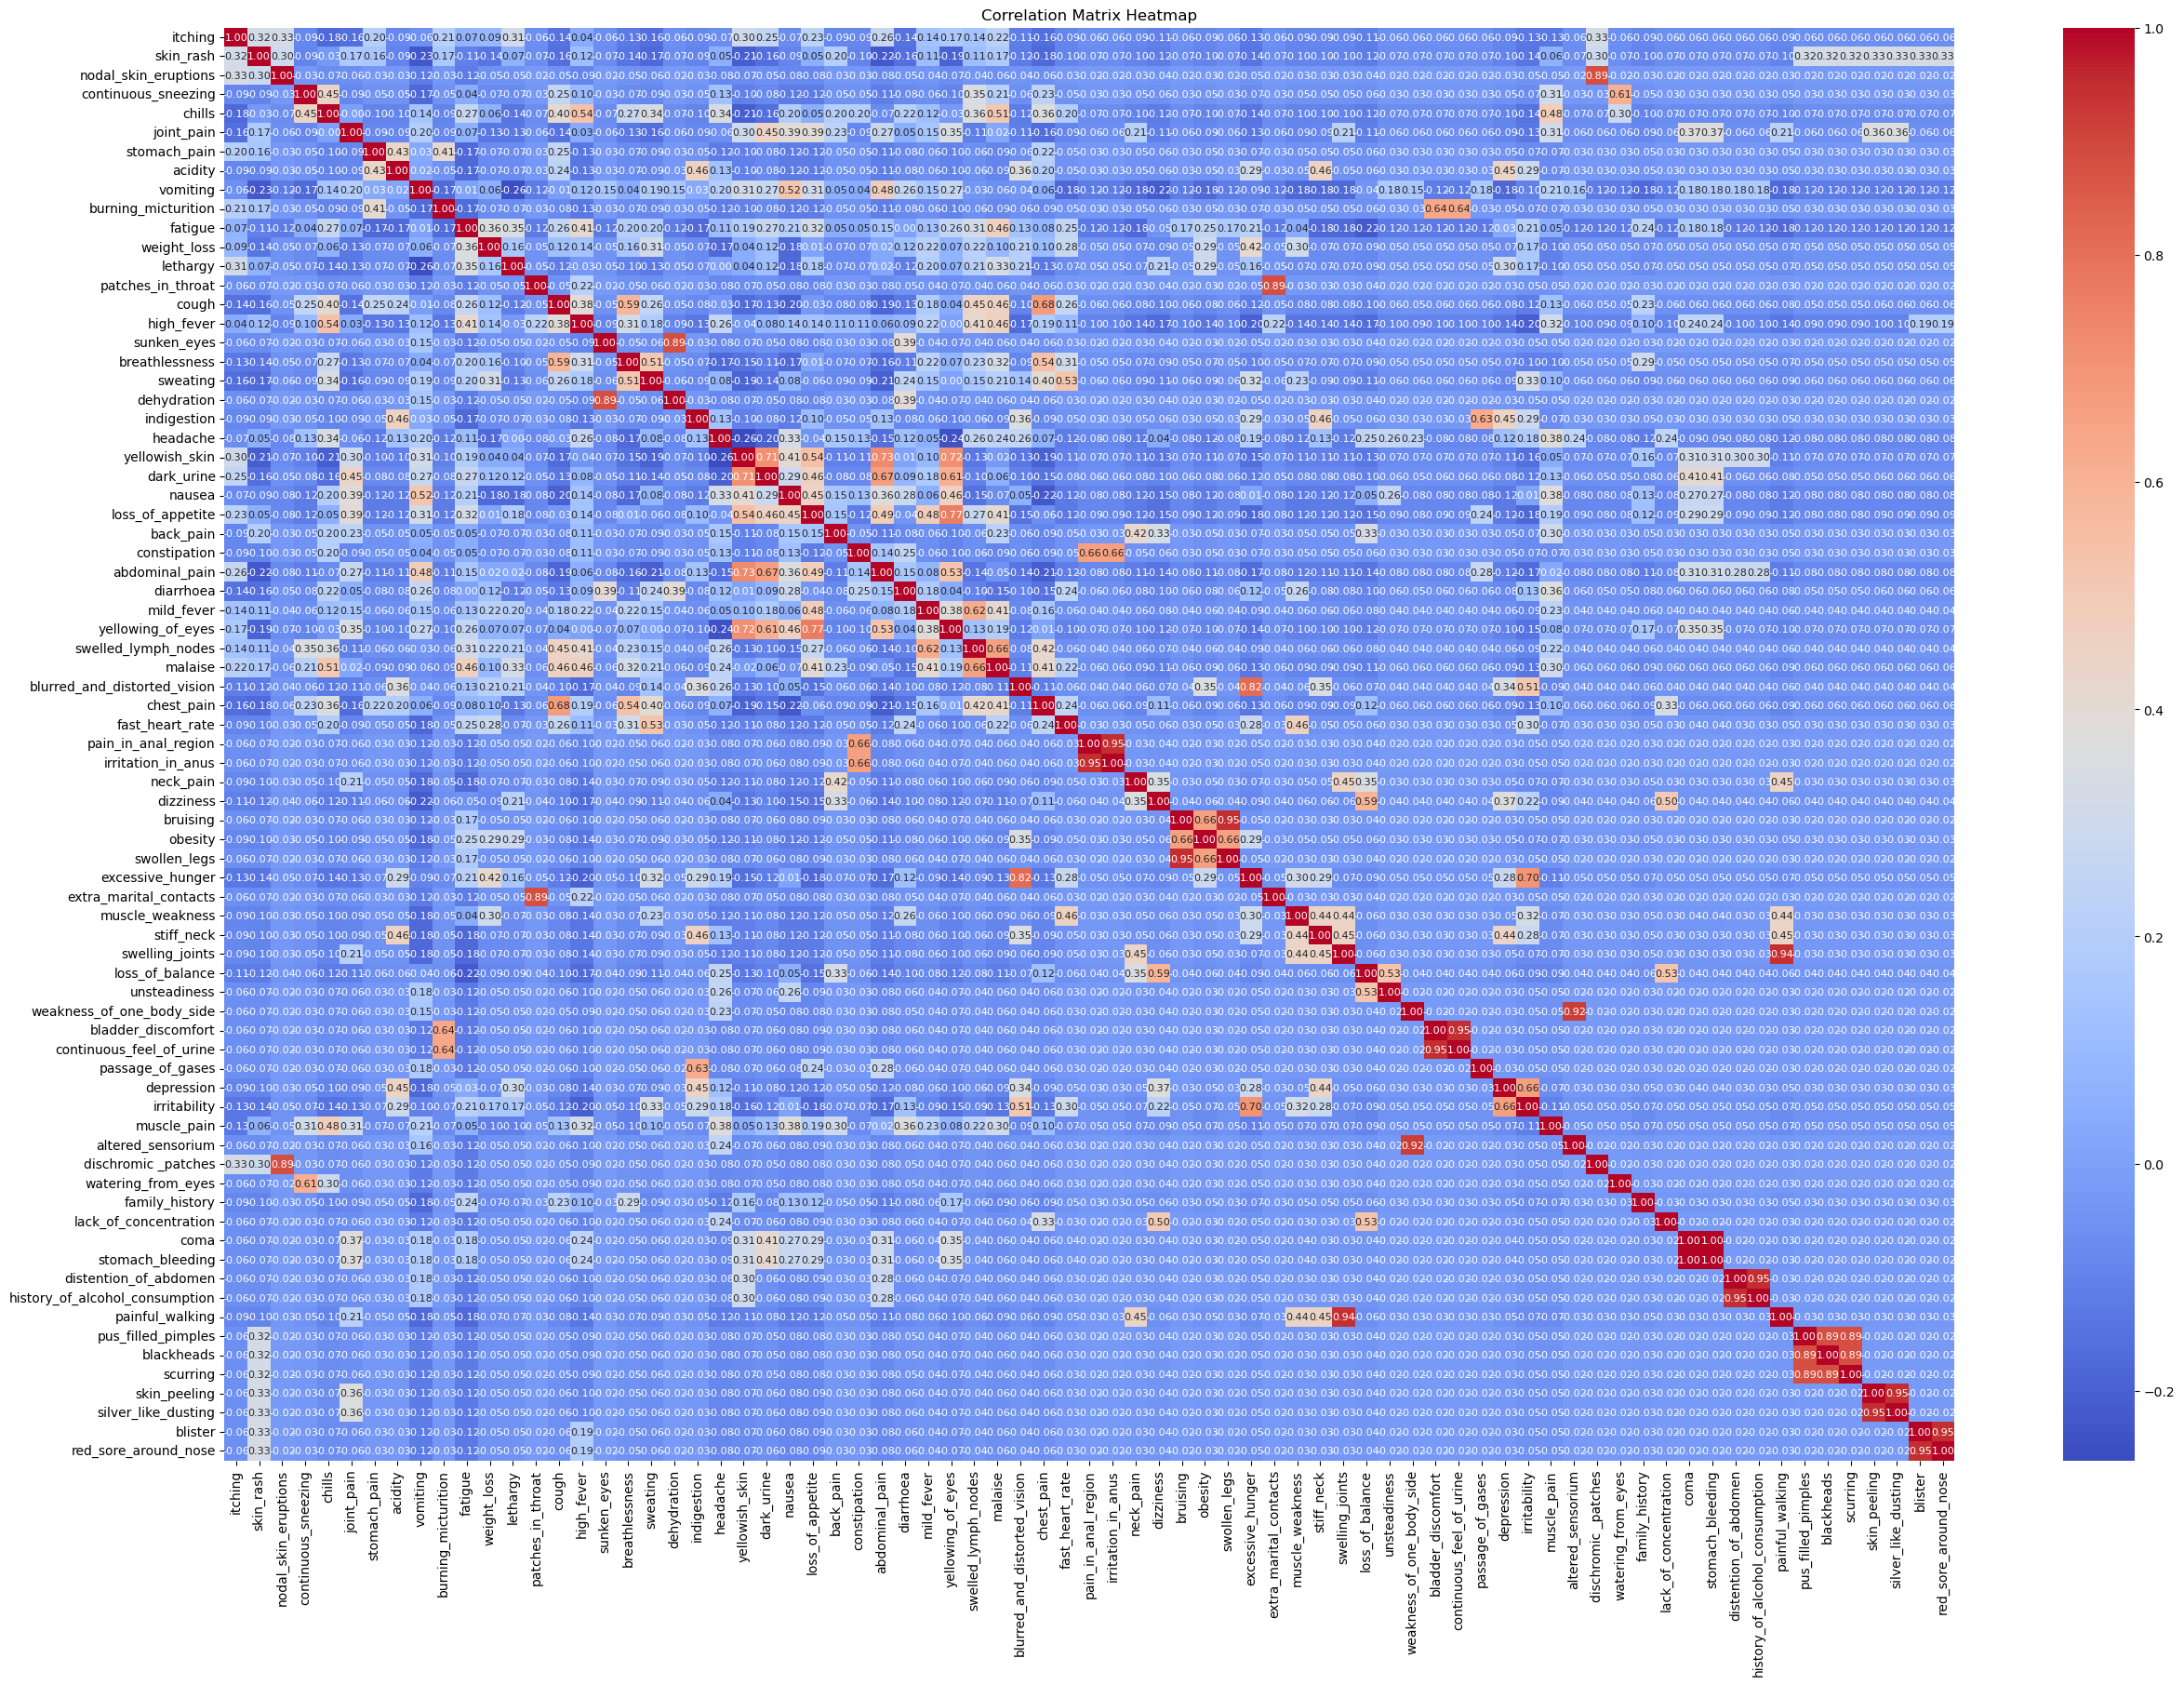

In [30]:
plt.figure(figsize=(30,20))
corr_matrix = train_reduced.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"fontsize":8})
plt.title('Correlation Matrix Heatmap')
plt.show()

#Seperate the target variable from feature Variable in  new Test and Train data and lable encoding Prognosis

In [31]:

X_train = train_reduced.drop('prognosis', axis=1)
y_train = train_reduced['prognosis']
X_test = test_reduced.drop('prognosis', axis=1)
y_test = test_reduced['prognosis']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


#Applpying Decison Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
y_test_pred_dt = dt.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred_dt)

In [33]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
overfitting_score = accuracy_train - accuracy_test
print("Accuracy score on training data:", accuracy_train)
print("Accuracy score on test data:", accuracy_test)
print("Overfitting score:", overfitting_score)

Accuracy score on training data: 1.0
Accuracy score on test data: 0.9761904761904762
Overfitting score: 0.023809523809523836


#Plotting Feature Importance of DT

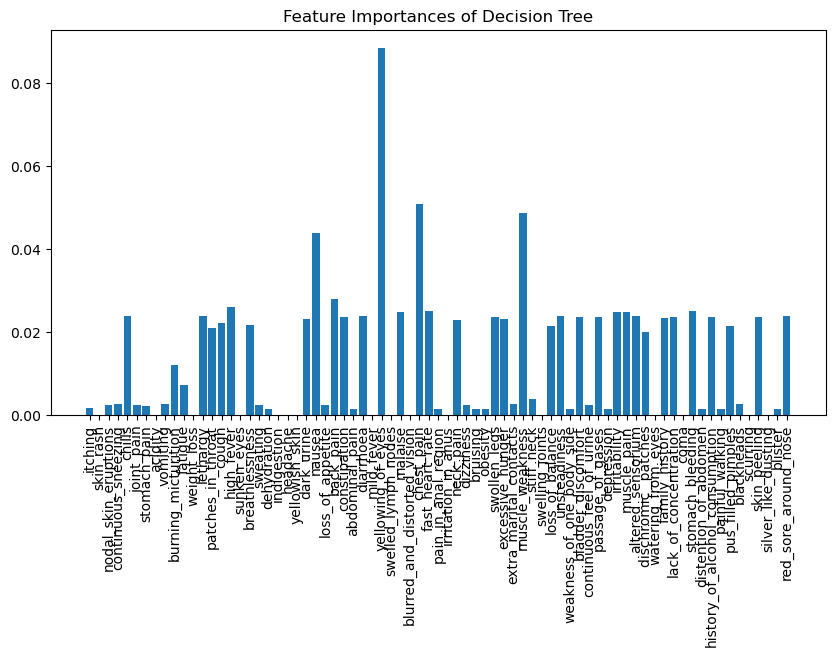

In [34]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(range(len(dt.feature_importances_)), dt.feature_importances_)
ax.set_xticks(range(len(dt.feature_importances_)))
ax.set_xticklabels(X_train.columns, rotation=90)
ax.set_title("Feature Importances of Decision Tree")
plt.show()

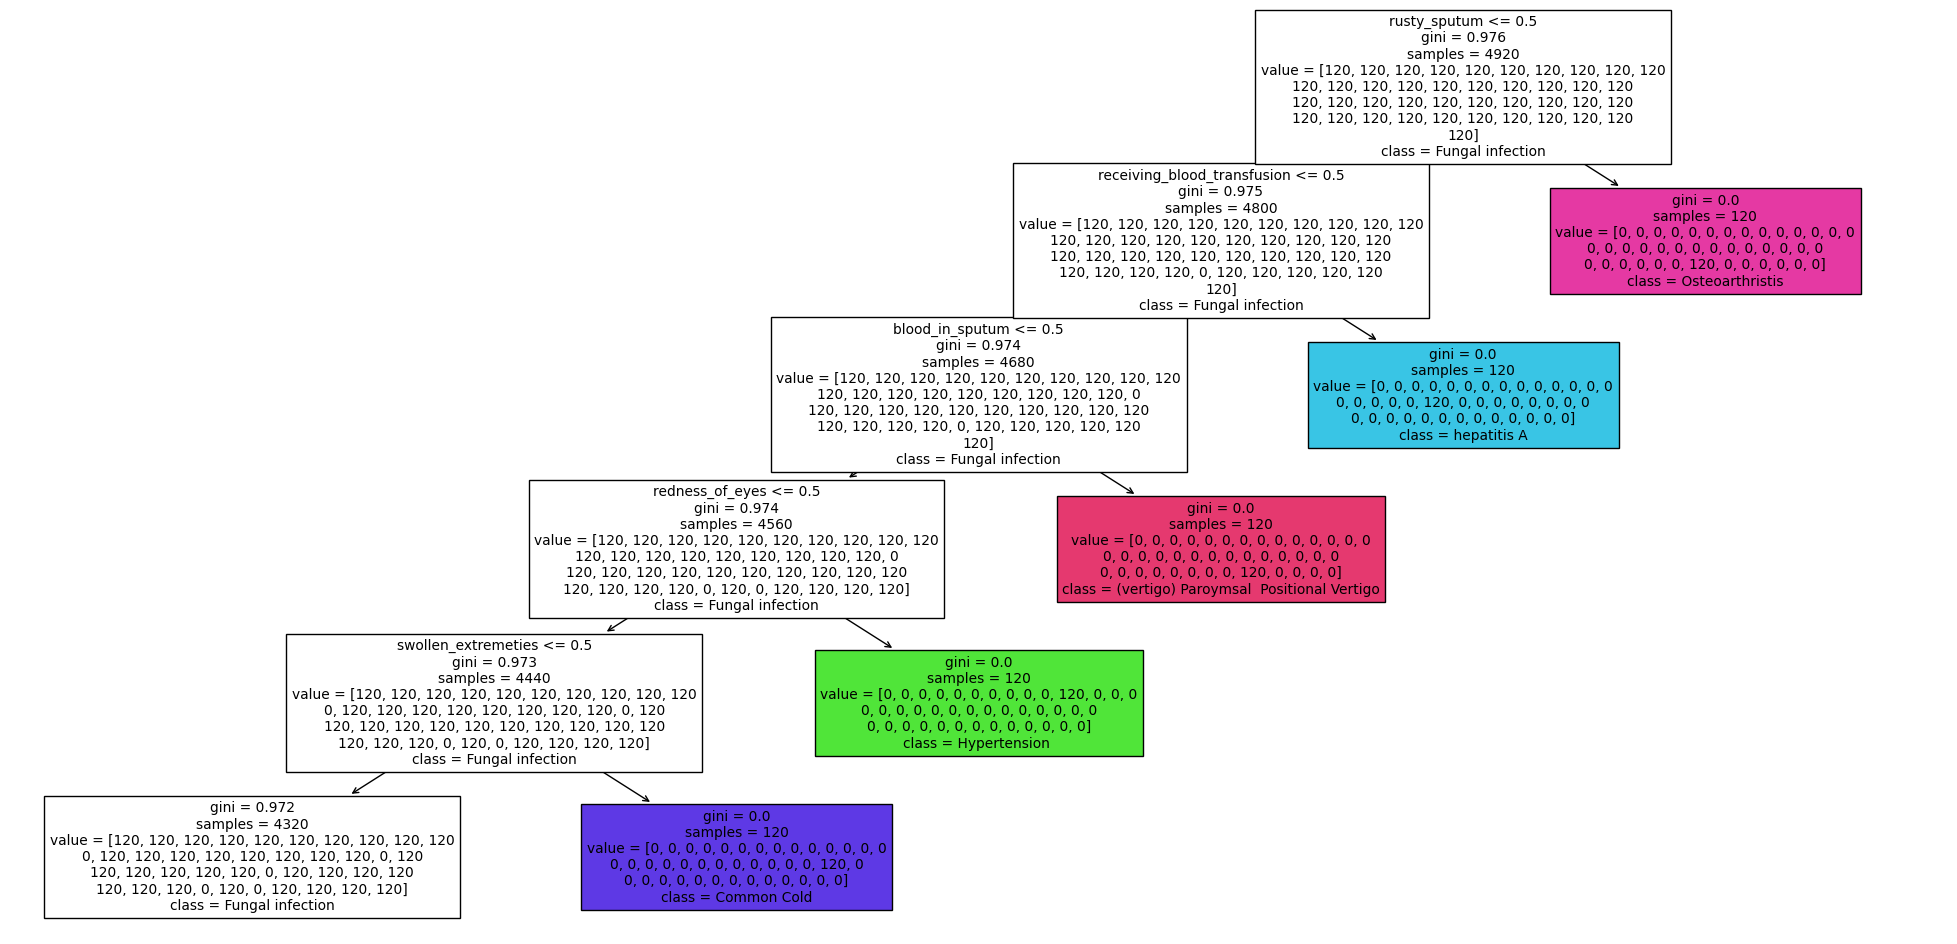

In [35]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X, y)
plt.figure(figsize=(25,12))
plot_tree(dt, feature_names=X.columns, class_names=y.unique(), filled=True)
plt.show()

#Applying Random Forest Classifier

In [36]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)


accuracy_train = accuracy_score(y_train, y_train_pred_rf)
accuracy_test = accuracy_score(y_test, y_test_pred_rf)

overfitting_score_rf = accuracy_train - accuracy_test

print("Accuracy score on training data:", accuracy_train)
print("Accuracy score on test data:", accuracy_test)
print("overfitting score is ", overfitting_score_rf)



Accuracy score on training data: 1.0
Accuracy score on test data: 0.9761904761904762
overfitting score is  0.023809523809523836


Plotting Feature Importance of RF

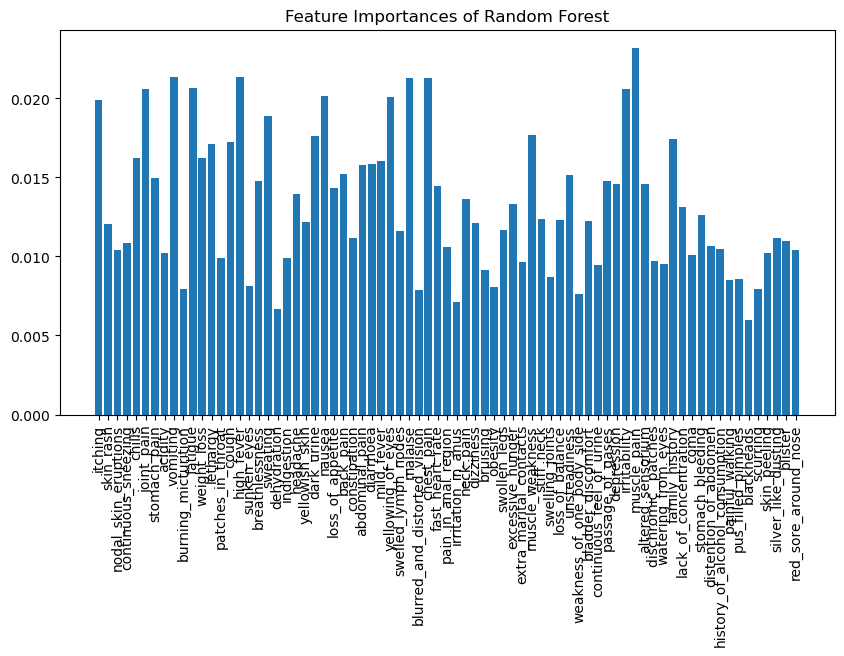

In [37]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(range(len(rf.feature_importances_)), rf.feature_importances_)
ax.set_xticks(range(len(rf.feature_importances_)))
ax.set_xticklabels(X_train.columns, rotation=90)
ax.set_title("Feature Importances of Random Forest")
plt.show()


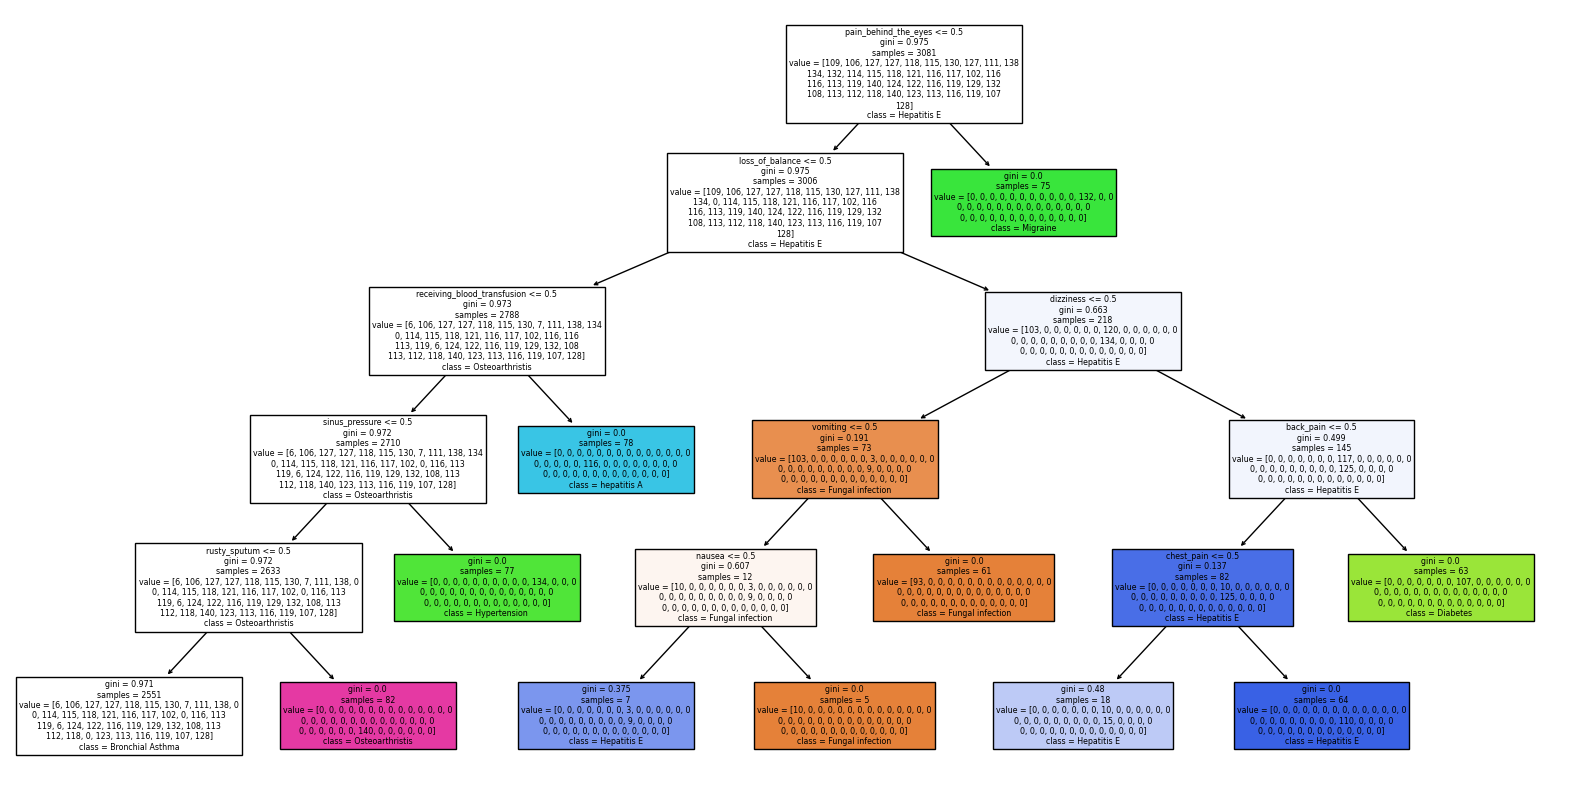

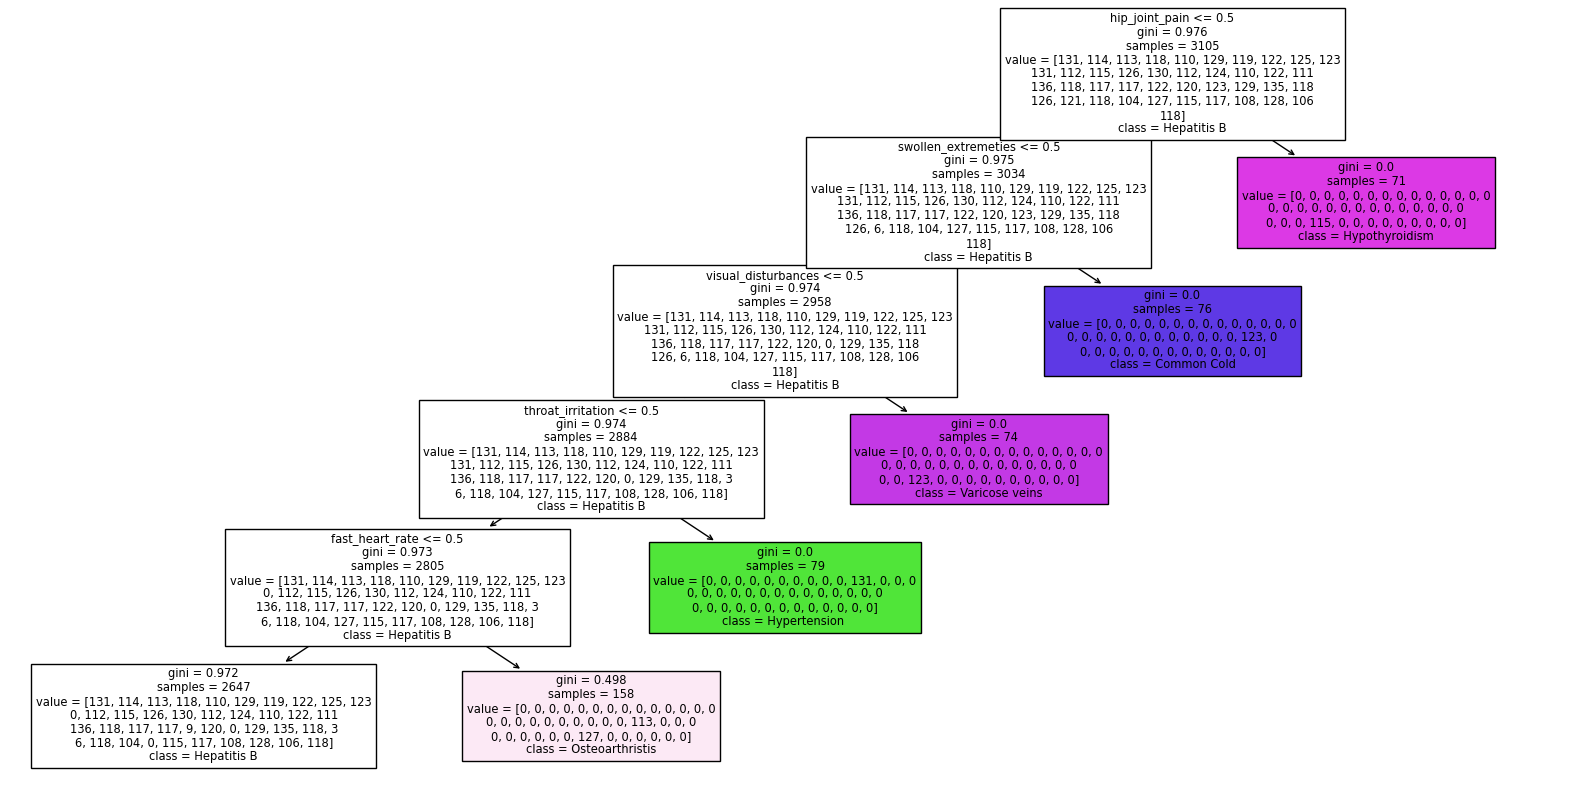

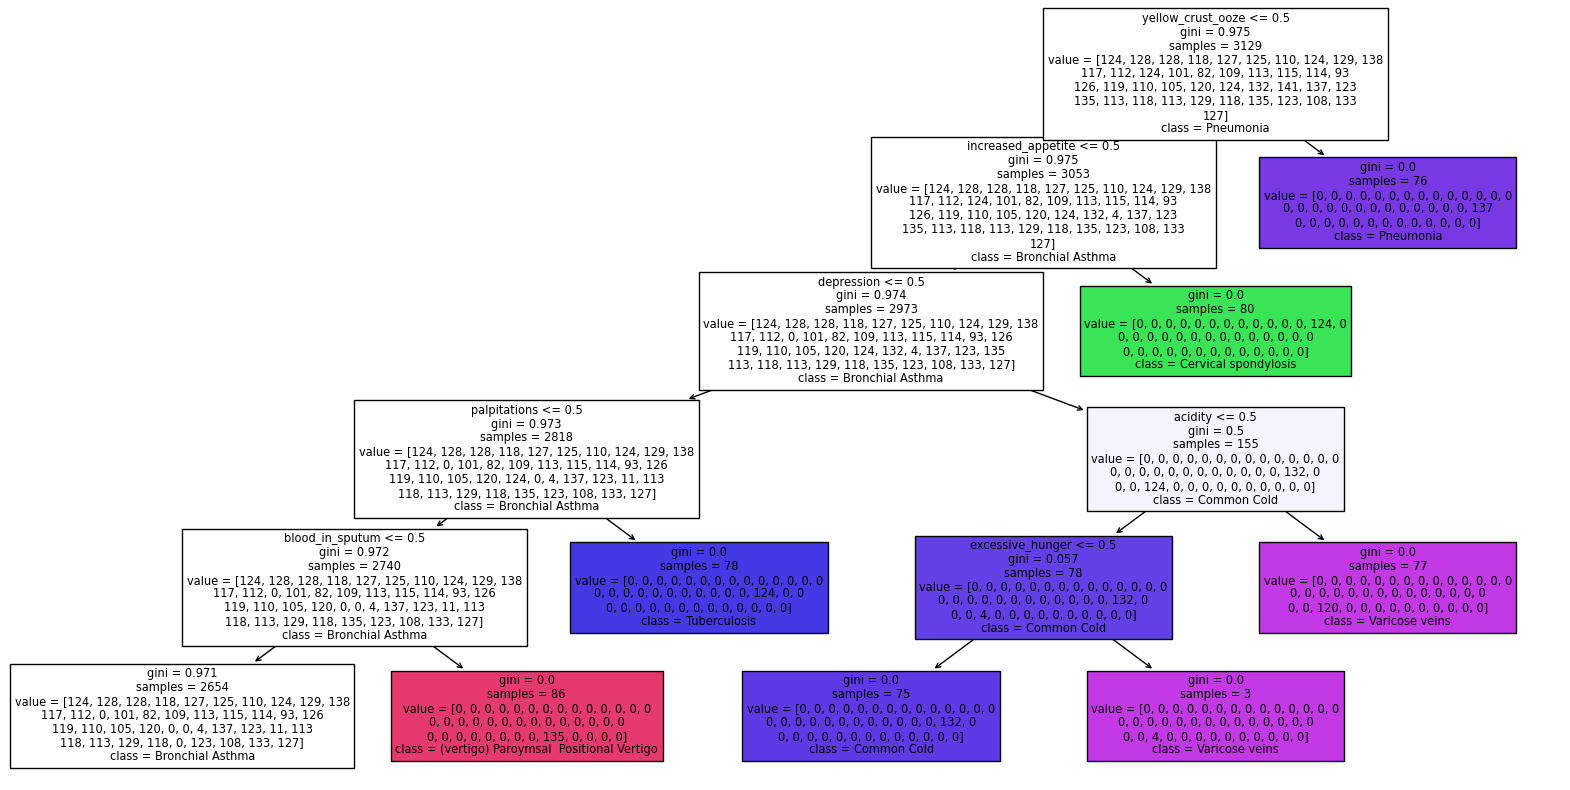

In [38]:


# assuming X and y are the feature and target variables, respectively
rf = RandomForestClassifier(n_estimators=3,max_depth=5)
rf.fit(X, y)

for i in range(3):
    plt.figure(figsize=(20,10))
    plot_tree(rf.estimators_[i], feature_names=X.columns, class_names=y.unique(), filled=True)
    plt.show()


SVM

In [39]:


svm_linear = SVC(kernel='linear')
svm_poly = SVC(kernel='poly')
svm_rbf = SVC(kernel='rbf')

svm_linear.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

train_preds_linear = svm_linear.predict(X_train)
test_preds_linear = svm_linear.predict(X_test)

train_preds_poly = svm_poly.predict(X_train)
test_preds_poly = svm_poly.predict(X_test)

train_preds_rbf = svm_rbf.predict(X_train)
test_preds_rbf = svm_rbf.predict(X_test)

train_acc_linear = accuracy_score(y_train, train_preds_linear)
test_acc_linear = accuracy_score(y_test, test_preds_linear)

train_acc_poly = accuracy_score(y_train, train_preds_poly)
test_acc_poly = accuracy_score(y_test, test_preds_poly)

train_acc_rbf = accuracy_score(y_train, train_preds_rbf)
test_acc_rbf = accuracy_score(y_test, test_preds_rbf)

print('Linear Kernel Accuracy -- Training:', train_acc_linear, 'Testing:', test_acc_linear)
print('Polynomial Kernel Accuracy -- Training:', train_acc_poly, 'Testing:', test_acc_poly)
print('RBF Kernel Accuracy -- Training:', train_acc_rbf, 'Testing:', test_acc_rbf)

overfitting_score_linear = train_acc_linear - test_acc_linear
overfitting_score_poly = train_acc_poly - test_acc_poly
overfitting_score_rbf = train_acc_rbf - test_acc_rbf

print('Linear Kernel Overfitting Score:', overfitting_score_linear)
print('Polynomial Kernel Overfitting Score:', overfitting_score_poly)
print('RBF Kernel Overfitting Score:', overfitting_score_rbf)


Linear Kernel Accuracy -- Training: 1.0 Testing: 1.0
Polynomial Kernel Accuracy -- Training: 1.0 Testing: 0.9761904761904762
RBF Kernel Accuracy -- Training: 1.0 Testing: 0.9761904761904762
Linear Kernel Overfitting Score: 0.0
Polynomial Kernel Overfitting Score: 0.023809523809523836
RBF Kernel Overfitting Score: 0.023809523809523836


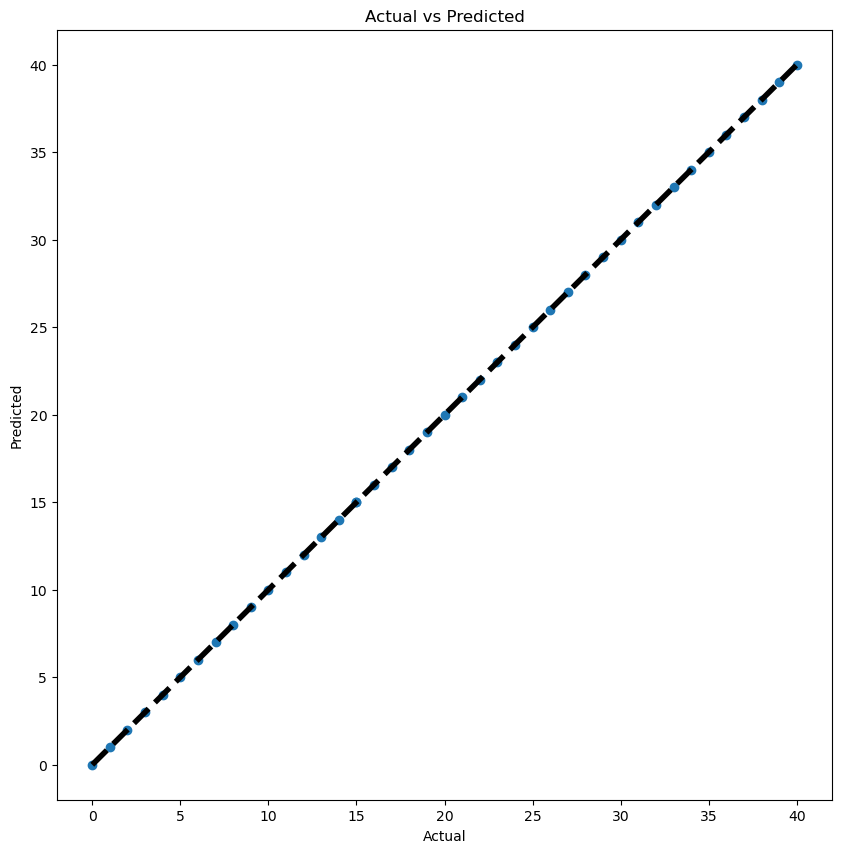

In [40]:


# assuming clf is the classifier object and X_test and y_test are the testing data and labels
y_pred = svm_linear.predict(X_test)

plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()



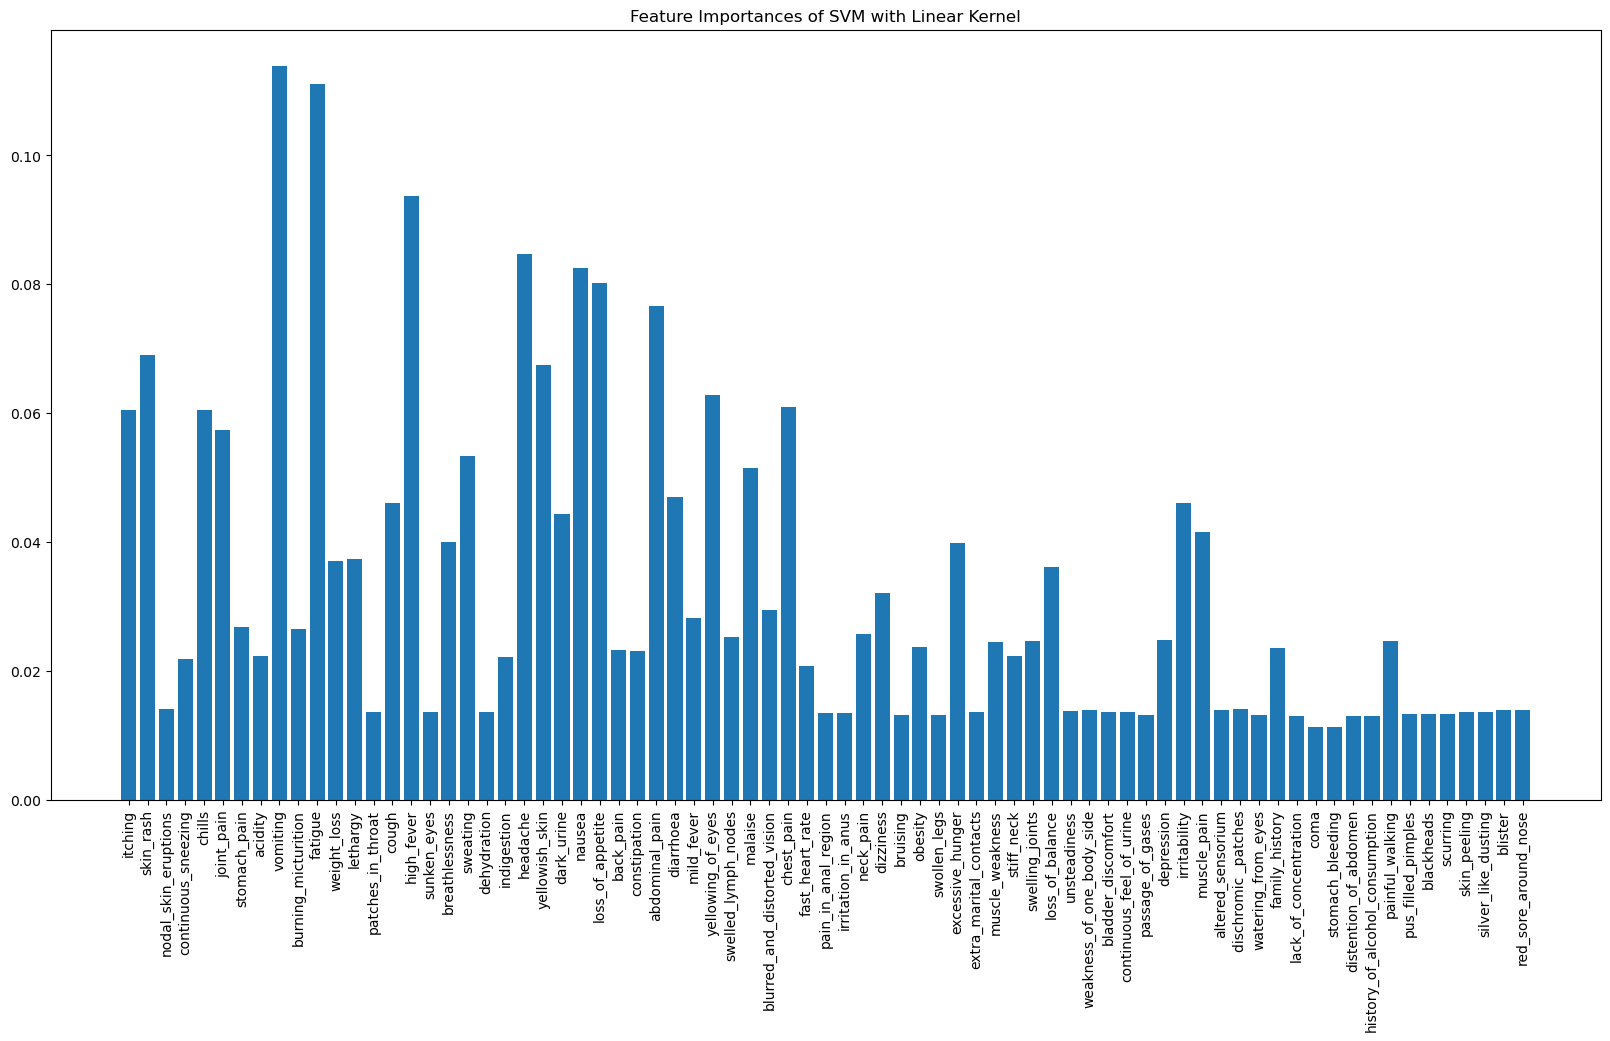

In [41]:
svm_linear_coefficients = np.abs(svm_linear.coef_)
svm_linear_mean_coefficients = np.mean(svm_linear_coefficients, axis=0)
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(range(len(svm_linear_mean_coefficients)), svm_linear_mean_coefficients)
ax.set_xticks(range(len(svm_linear_mean_coefficients)))
ax.set_xticklabels(X_train.columns, rotation=90)
ax.set_title("Feature Importances of SVM with Linear Kernel")
plt.show()

#***XGBoost***

In [42]:
xg = xgb.XGBClassifier()
xg.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [43]:
y_train_pred=xg.predict(X_train)
y_test_pred=xg.predict(X_test)

In [44]:
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Accuracy score on training data:", accuracy_train)
print("Accuracy score on test data:", accuracy_test)

Accuracy score on training data: 1.0
Accuracy score on test data: 0.9761904761904762


In [45]:

train_rmse = mean_squared_error(y_train, xg.predict(X_train), squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
overfitting_score_XG = test_rmse - train_rmse

print("Training RMSE: {:.3f}".format(train_rmse))
print("Testing RMSE: {:.3f}".format(test_rmse))
print("Overfitting Score: {:.3f}".format(overfitting_score_XG))

Training RMSE: 0.000
Testing RMSE: 3.086
Overfitting Score: 3.086


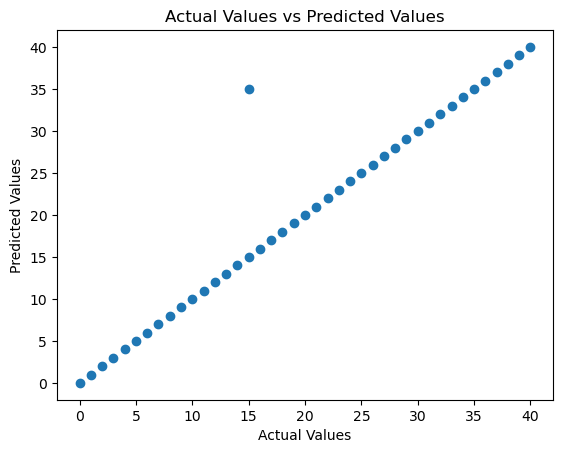

In [46]:
plt.scatter(y_test,y_test_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual Values vs Predicted Values")
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

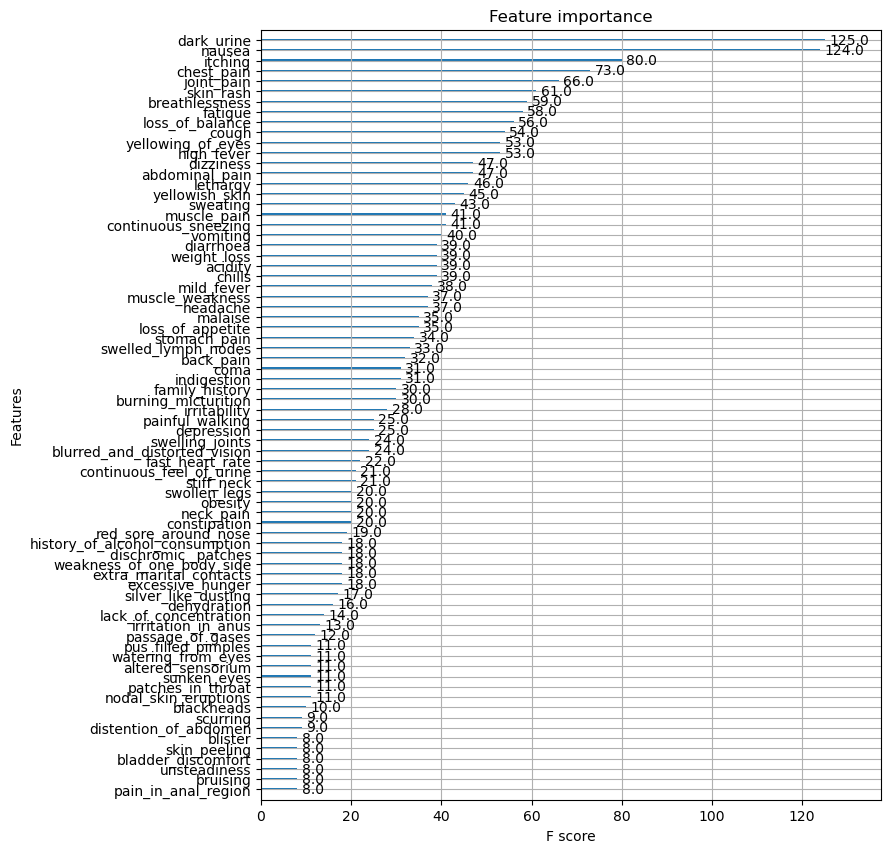

In [47]:
plt.rcParams["figure.figsize"] = (8, 10)
plot_importance(booster=xg)

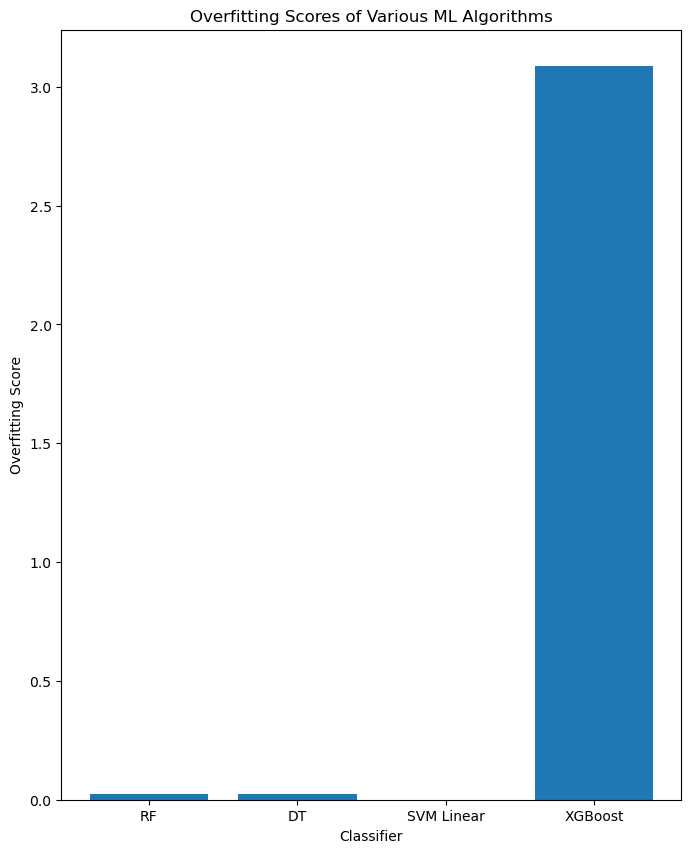

<Figure size 500x500 with 0 Axes>

In [48]:
plt.bar(['RF', 'DT', 'SVM Linear', 'XGBoost'], [overfitting_score_rf, overfitting_score, overfitting_score_linear, overfitting_score_XG])
plt.xlabel('Classifier')
plt.ylabel('Overfitting Score')
plt.title('Overfitting Scores of Various ML Algorithms')
plt.figure(figsize=(5,5))
plt.show()
